<a href="https://colab.research.google.com/github/Wahyu-triu/RFM-Customer-Segmentation/blob/main/RFM_Customer_Segmentation_PracticeCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Survivor

Members:
1. Alexander Patrick Surjono
2. Ramzy Mohammad
3. Retno Dewi Yulianti
4. Stella Linda Cyrilla
5. Wahyu Tri Utomo 

## Mount to Google Drive

In [ ]:
#mount at gdrive
from google.colab import drive
drive.mount('/drive',force_remount=True)

Mounted at /drive


## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

Source: https://www.kaggle.com/tunguz/online-retail

Columns:
* InvoiceNo: Invoice number.
* StockCode: Product (item) code.
* Description: Product (item) name.
* Quantity: The quantities of each product (item) per transaction.
* InvoiceDate: Invoice Date and time.
* UnitPrice: Unit price (in sterling)
* CustomerID: Customer number.
* Country: Country name.

In [ ]:
dataset = pd.read_csv('/drive/MyDrive/Iykra/PracticeCase_RFM/Online_Retail.csv',encoding= 'unicode_escape')
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


## Dataset Checking

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#dataset size
dataset.shape

(541909, 8)

In [ ]:
#checking null values
dataset.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#rename some columns
dataset=dataset.rename(columns={'UnitPrice':'Price','CustomerID':'Customer ID','InvoiceNo':'Invoice'})

In [ ]:
#remove rows with null cust ID
dataset.dropna(subset=['Customer ID'], axis=0,inplace=True)

In [ ]:
#number of unique values in each column
dataset.nunique()

Invoice        22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
Price            620
Customer ID     4372
Country           37
dtype: int64

## Data Prep

In [ ]:
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])
dataset['InvoiceDate'] = dataset['InvoiceDate'].dt.date

In [ ]:
dataset['Amount'] = dataset['Price'] * dataset['Quantity']

In [ ]:
dataset.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


In [ ]:
#cek amount negative
dataset.describe()

,Quantity,Price,Customer ID,Amount
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [ ]:
#remove negative values of amount and quantity
dataset = dataset[dataset['Quantity']>0]

### Get Value Recency, Freq, Monetary

In [ ]:
# Recency : selisih waktu transaksi terakhir per customer dengan tanggal data diambil
#max_date: tgl terakhir pengambilan data
max_date = dataset['InvoiceDate'].max()
max_date

datetime.date(2011, 12, 9)

Digunakan aggregate untuk menghitung Recency, Frequency and Monetary
*   agg max InvoiceDate: mengambil nilai Recency
*   agg count Invoice: menghitung banyak (count) transaksi yg dilakukan per customer
*   agg monetary: menghitung jumlah (sum) dari amount per customer

In [ ]:
#get the cust_aggregate dataframe which contains the last transaction date, count of invoice and sum of amount for each customer ID
Cust_aggregate = dataset.groupby('Customer ID').agg({'InvoiceDate':'max','Invoice':'count', 'Amount':'sum'}).reset_index()

In [ ]:
Cust_aggregate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  4339 non-null   float64
 1   InvoiceDate  4339 non-null   object 
 2   Invoice      4339 non-null   int64  
 3   Amount       4339 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 135.7+ KB


In [ ]:
Cust_aggregate.head()

,Customer ID,InvoiceDate,Invoice,Amount
0,12346.0,2011-01-18,1,77183.60
1,12347.0,2011-12-07,182,4310.00
2,12348.0,2011-09-25,31,1797.24
3,12349.0,2011-11-21,73,1757.55
4,12350.0,2011-02-02,17,334.40


In [ ]:
Cust_aggregate['Recency'] = (max_date - Cust_aggregate['InvoiceDate']).dt.days

In [ ]:
Cust_aggregate.rename({'Invoice':'Freq','Amount':'Monetary'}, axis=1, inplace=True)

In [ ]:
Cust_aggregate.describe()

,Customer ID,Freq,Monetary,Recency
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,91.708689,2053.793018,92.041484
std,1721.889758,228.792852,8988.248381,100.007757
min,12346.000000,1.000000,0.000000,0.000000
25%,13812.500000,17.000000,307.245000,17.000000
50%,15299.000000,41.000000,674.450000,50.000000
75%,16778.500000,100.000000,1661.640000,141.500000
max,18287.000000,7847.000000,280206.020000,373.000000


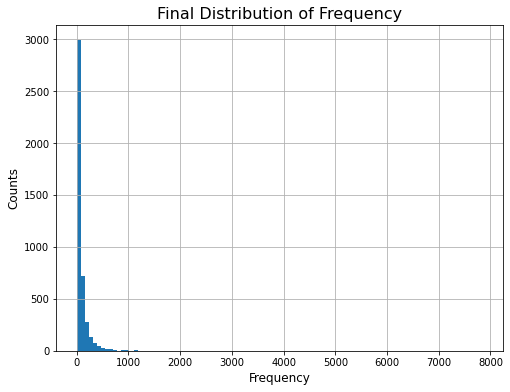

In [ ]:
fig, ax = plt.subplots(figsize=(8,6));
Cust_aggregate.Freq.hist(bins=100,ax=ax)
ax.set_title("Final Distribution of Frequency", fontsize=16)
ax.set_xlabel("Frequency", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

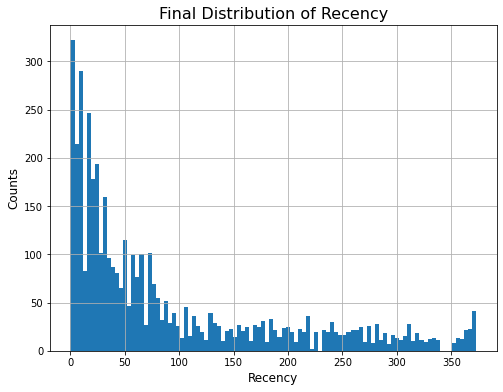

In [ ]:
fig, ax = plt.subplots(figsize=(8,6));
Cust_aggregate.Recency.hist(bins=100,ax=ax)
ax.set_title("Final Distribution of Recency", fontsize=16)
ax.set_xlabel("Recency", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

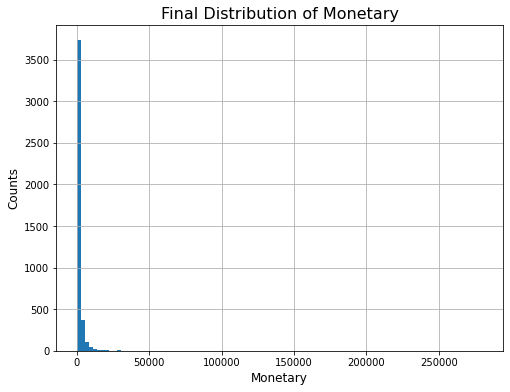

In [ ]:
fig, ax = plt.subplots(figsize=(8,6));
Cust_aggregate.Monetary.hist(bins=100,ax=ax)
ax.set_title("Final Distribution of Monetary", fontsize=16)
ax.set_xlabel("Monetary", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

### Adding Age and Return Variables

In [ ]:
#RFM - AR
Cust_Age = dataset.groupby('Customer ID')['InvoiceDate'].min().reset_index()
Cust_Age['Age'] = (max_date - Cust_Age['InvoiceDate']).dt.days

In [ ]:
Cust_Age.head(2)

,Customer ID,InvoiceDate,Age
0,12346.0,2011-01-18,325
1,12347.0,2010-12-07,367


In [ ]:
#return: menunjukkan dalam berapa lama (hari) customer akan melakukan transaksi kembali
#.diff(): selisih waktu antar jarak transaksi
Cust_return = dataset[['Customer ID','InvoiceDate']].drop_duplicates()
Cust_return = Cust_return.sort_values(by=['Customer ID','InvoiceDate'],axis=0)
Cust_return = Cust_return[['Customer ID','InvoiceDate']].drop_duplicates().set_index('Customer ID').diff()
Cust_return['Nrow'] = Cust_return.groupby('Customer ID').cumcount()+1 

In [ ]:
Cust_return

,InvoiceDate,Nrow
Customer ID,,
12346.0,NaN,1
12347.0,"-42 days, 0:00:00",1
12347.0,"50 days, 0:00:00",2
12347.0,"71 days, 0:00:00",3
12347.0,"63 days, 0:00:00",4
...,...,...
18283.0,"7 days, 0:00:00",13
18283.0,"6 days, 0:00:00",14
18287.0,"-198 days, 0:00:00",1


In [ ]:
Cust_return['InvoiceDate'].unique()

array([nan, datetime.timedelta(days=-42), datetime.timedelta(days=50),
       datetime.timedelta(days=71), datetime.timedelta(days=63),
       datetime.timedelta(days=54), datetime.timedelta(days=90),
       datetime.timedelta(days=37), datetime.timedelta(days=-356),
       datetime.timedelta(days=40), datetime.timedelta(days=70),
       datetime.timedelta(days=173), datetime.timedelta(days=57),
       datetime.timedelta(days=-292), datetime.timedelta(days=14),
       datetime.timedelta(days=13), datetime.timedelta(days=16),
       datetime.timedelta(days=5), datetime.timedelta(days=182),
       datetime.timedelta(days=8), datetime.timedelta(days=36),
       datetime.timedelta(days=-168), datetime.timedelta(days=-28),
       datetime.timedelta(days=18), datetime.timedelta(days=-111),
       datetime.timedelta(days=80), datetime.timedelta(days=223),
       datetime.timedelta(days=-11), datetime.timedelta(days=-117),
       datetime.timedelta(days=149), datetime.timedelta(days=-330),
   

In [ ]:
Cust_return = Cust_return.sort_values(by='Customer ID').reset_index()

In [ ]:
Cust_return

,Customer ID,InvoiceDate,Nrow
0,12346.0,NaN,1
1,12347.0,"-42 days, 0:00:00",1
2,12347.0,"50 days, 0:00:00",2
3,12347.0,"71 days, 0:00:00",3
4,12347.0,"63 days, 0:00:00",4
...,...,...,...
16761,18283.0,"9 days, 0:00:00",7
16762,18283.0,"6 days, 0:00:00",14
16763,18287.0,"143 days, 0:00:00",2
16764,18287.0,"-198 days, 0:00:00",1


In [ ]:
Cust_Age_Return = pd.merge(Cust_Age, Cust_return, on="Customer ID")
Cust_Age_Return.columns =['Customer ID','Invoice Date', 'Age','Return','Nrow']
Cust_Age_Return.head(2)

,Customer ID,Invoice Date,Age,Return,Nrow
0,12346.0,2011-01-18,325,NaN,1
1,12347.0,2010-12-07,367,"-42 days, 0:00:00",1


In [ ]:
#merge with data Cust_aggregate
Cust_aggregate = pd.merge(Cust_aggregate, Cust_Age_Return, on="Customer ID", how="left")
Cust_aggregate.isna().sum()

Customer ID     0
InvoiceDate     0
Freq            0
Monetary        0
Recency         0
Invoice Date    0
Age             0
Return          1
Nrow            0
dtype: int64

In [ ]:
#remove first transaction except for the only one transaction
Cust_aggregate = Cust_aggregate[((Cust_aggregate['Nrow']!=1) &(Cust_aggregate['Freq']>1))] 

In [ ]:
Cust_aggregate['Return'] = Cust_aggregate['Return'].apply(lambda x: x.days)
# Cust_aggregate.drop(['Invoice Date','Nrow'],axis=1, inplace=True)
Cust_aggregate.groupby('Customer ID').agg({'Age':'min','Return':'median'}).reset_index()

,Customer ID,Age,Return
0,12347.0,367,58.5
1,12348.0,358,70.0
2,12352.0,296,14.5
3,12356.0,325,151.5
4,12358.0,150,149.0
...,...,...,...
2785,18272.0,246,43.0
2786,18273.0,257,127.5
2787,18282.0,126,119.0
2788,18283.0,337,21.0


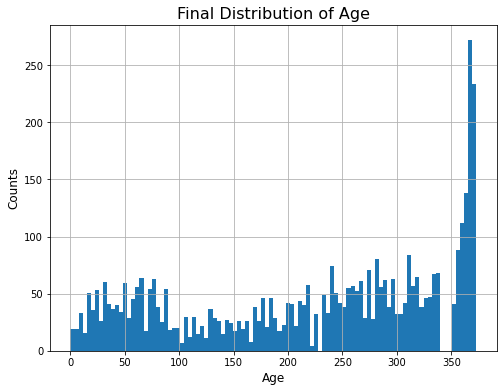

In [ ]:
#distribution for Age

fig, ax = plt.subplots(figsize=(8,6));
Cust_Age.Age.hist(bins=100,ax=ax)
ax.set_title("Final Distribution of Age", fontsize=16)
ax.set_xlabel("Age", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

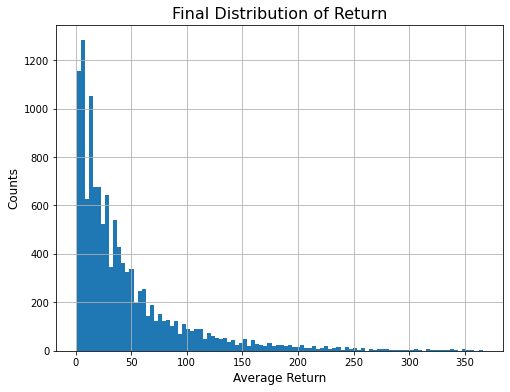

In [ ]:
#distribution for Return

fig, ax = plt.subplots(figsize=(8,6));
Cust_aggregate.Return.hist(bins=100,ax=ax)
ax.set_title("Final Distribution of Return", fontsize=16)
ax.set_xlabel("Average Return", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

In [ ]:
Cust_aggregate.head(2)

,Customer ID,InvoiceDate,Freq,Monetary,Recency,Invoice Date,Age,Return,Nrow
2,12347.0,2011-12-07,182,4310.0,2,2010-12-07,367,50,2
3,12347.0,2011-12-07,182,4310.0,2,2010-12-07,367,71,3


### Segmentasi RFM-AR

In [ ]:
RFM_scores = Cust_aggregate

In [ ]:
#membuat 5 kolom baru untuk score R,F,M,A,Re
RFM_scores['R']    = pd.qcut(RFM_scores['Recency'], 3, labels=[3, 2, 1])
RFM_scores['F']    = pd.qcut(RFM_scores['Freq'], 3, labels=[1, 2, 3])
RFM_scores['M']    = pd.qcut(RFM_scores['Monetary'], 3, labels=[1, 2, 3])
RFM_scores['A']    = pd.qcut(RFM_scores['Age'], 3, labels=[1, 2, 3])
RFM_scores['Re']    = pd.qcut(RFM_scores['Return'].rank(method='first'), 3, labels=[3, 2, 1])

In [ ]:
RFM_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12427 entries, 2 to 16765
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Customer ID   12427 non-null  float64 
 1   InvoiceDate   12427 non-null  object  
 2   Freq          12427 non-null  int64   
 3   Monetary      12427 non-null  float64 
 4   Recency       12427 non-null  int64   
 5   Invoice Date  12427 non-null  object  
 6   Age           12427 non-null  int64   
 7   Return        12427 non-null  int64   
 8   Nrow          12427 non-null  int64   
 9   R             12427 non-null  category
 10  F             12427 non-null  category
 11  M             12427 non-null  category
 12  A             12427 non-null  category
 13  Re            12427 non-null  category
dtypes: category(5), float64(2), int64(5), object(2)
memory usage: 1.0+ MB


In [ ]:
RFM_scores[['R','Freq','Monetary','Recency']].groupby('R').describe()

Freq                                       ... Recency                         
    count        mean          std  min    25%  ...     min   25%   50%   75%    max
R                                               ...                                 
3  4241.0  955.553643  1695.719113  3.0  157.0  ...     0.0   1.0   2.0   3.0    5.0
2  4061.0  258.352130   292.225884  2.0   85.0  ...     7.0   9.0  12.0  17.0   23.0
1  4125.0  121.807515   119.500443  2.0   42.0  ...    24.0  33.0  53.0  93.0  372.0

[3 rows x 24 columns]

In [ ]:
RFM_scores['R'] = RFM_scores['R'].astype('int')
RFM_scores['F'] = RFM_scores['F'].astype('int')
RFM_scores['M'] = RFM_scores['M'].astype('int')
RFM_scores['A'] = RFM_scores['A'].astype('int')
RFM_scores['Re'] = RFM_scores['Re'].astype('int')

In [ ]:
#membuat kolom baru rfm_scores yg berisi penjumlahan seluruh score R,F,M,A,Re
RFM_scores['rfm_score'] = RFM_scores['R'] + RFM_scores['F'] + RFM_scores['M']+ RFM_scores['A']+ RFM_scores['Re']

In [ ]:
#membuat kolom baru rfm_scores yg berisi concatenate dari string score R,F,M,A,Re
RFM_scores['rfm_score_str'] = RFM_scores['R'].map(str) + RFM_scores['F'].map(str) + RFM_scores['M'].map(str)+ RFM_scores['A'].map(str)+ RFM_scores['Re'].map(str)

In [ ]:
RFM_scores['rfm_score_str'].unique()

array(['32231', '32232', '11121', '11122', '11213', '11212', '11211',
       '21221', '31111', '12321', '12322', '12211', '33213', '33211',
       '33212', '11111', '21112', '12223', '12221', '21111', '22211',
       '22212', '31112', '31113', '21222', '11123', '22233', '22231',
       '22232', '11112', '12311', '12313', '13323', '13322', '13321',
       '32222', '32221', '21121', '32121', '32123', '32122', '21131',
       '21132', '13312', '13313', '13311', '12333', '12332', '12331',
       '12213', '33333', '33331', '33332', '11311', '32223', '21211',
       '23323', '23321', '23322', '21122', '21123', '33323', '33322',
       '33321', '13332', '13331', '12212', '22323', '22322', '22321',
       '23312', '23313', '23311', '21223', '13223', '13221', '32321',
       '32323', '32322', '12222', '21113', '11113', '13211', '32212',
       '22122', '22123', '22121', '22222', '22223', '22221', '12111',
       '21331', '21332', '32211', '22213', '23333', '23332', '23331',
       '32213', '121

In [ ]:
RFM_scores['rfm_score_str'].nunique()

234

In [ ]:
RFM_scores['rfm_score'].unique()

array([11, 12,  6,  7,  8,  9, 10,  5, 15, 13, 14])

Dari penjumlahan seluruh score ke dalam kolom rfm_score, dapat dilihat bahwa ada 11 jenis nilai rfm_score yg berbeda. Selanjutnya, 11 jenis nilai ini akan diberi label yang berbeda.

Dari karakteristik masing-masing aspek R,F,M,A,Re kita dapat mengasumsikan bahwa semakin besar nilai penjumlahan di rfm_score, maka semakin loyal customer tersebut.



RFM Scores Criteria:

5-6: At Risk

7-10: Need Attention

11-12: Potential Loyalist

13-15: Champion

In [ ]:
label = {5:'At Risk',6:'At Risk',7:'Need Attention',8:'Need Attention',9:'Need Attention',10:'Need Attention',11:'Potential Loyalist',12:'Potential Loyalist',13:'Champion',14:'Champion',15:'Champion'}

In [ ]:
RFM_scores['label'] = RFM_scores['rfm_score'].map(label)

In [ ]:
RFM_scores.head(2)

,Customer ID,InvoiceDate,Freq,Monetary,Recency,Invoice Date,Age,Return,Nrow,R,F,M,A,Re,rfm_score,rfm_score_str,label
2,12347.0,2011-12-07,182,4310.0,2,2010-12-07,367,50,2,3,2,2,3,1,11,32231,Potential Loyalist
3,12347.0,2011-12-07,182,4310.0,2,2010-12-07,367,71,3,3,2,2,3,1,11,32231,Potential Loyalist


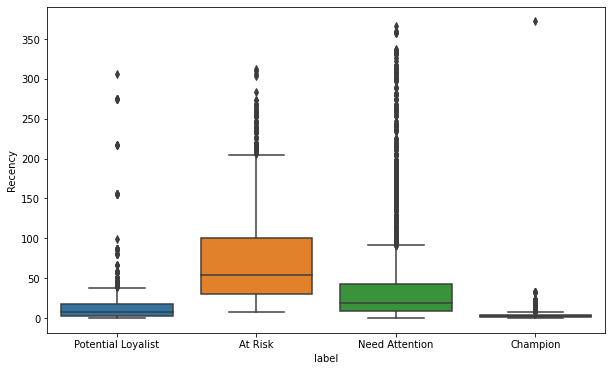

In [ ]:
fig, ax = plt.subplots(figsize=(10,6));
sns.boxplot(x='label', y = 'Recency', data = RFM_scores)
plt.show()

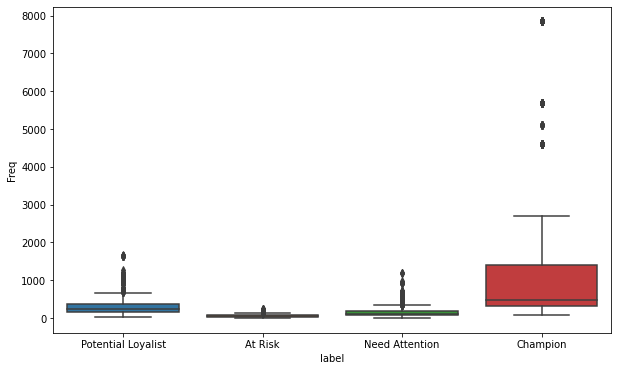

In [ ]:
fig, ax = plt.subplots(figsize=(10,6));
sns.boxplot(x='label', y = 'Freq', data = RFM_scores)
plt.show()

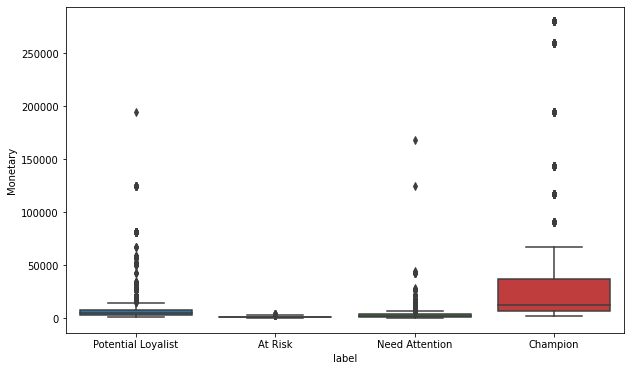

In [ ]:
fig, ax = plt.subplots(figsize=(10,6));
sns.boxplot(x='label', y = 'Monetary', data = RFM_scores)
plt.show()

In [ ]:
RFM_scores.head()

,Customer ID,InvoiceDate,Freq,Monetary,Recency,Invoice Date,Age,Return,Nrow,R,F,M,A,Re,rfm_score,rfm_score_str,label
2,12347.0,2011-12-07,182,4310.0,2,2010-12-07,367,50,2,3,2,2,3,1,11,32231,Potential Loyalist
3,12347.0,2011-12-07,182,4310.0,2,2010-12-07,367,71,3,3,2,2,3,1,11,32231,Potential Loyalist
4,12347.0,2011-12-07,182,4310.0,2,2010-12-07,367,63,4,3,2,2,3,1,11,32231,Potential Loyalist
5,12347.0,2011-12-07,182,4310.0,2,2010-12-07,367,54,5,3,2,2,3,1,11,32231,Potential Loyalist
6,12347.0,2011-12-07,182,4310.0,2,2010-12-07,367,90,6,3,2,2,3,1,11,32231,Potential Loyalist


In [ ]:
RFM_slice=RFM_scores.copy()
RFM_slice_freq=RFM_scores[['Freq','label']]
RFM_slice_recency=RFM_scores[['Recency','label']]
RFM_slice_monetary=RFM_scores[['Monetary','label']]

In [ ]:
RFM_slice_freq.groupby(by='label').describe()

Freq                            ...                       
                     count         mean          std  ...    50%     75%     max
label                                                 ...                       
At Risk             1861.0    51.685653    32.449175  ...   47.0    71.0   238.0
Champion            3099.0  1326.253630  1872.772412  ...  473.0  1400.0  7847.0
Need Attention      5242.0   138.159672   109.025316  ...  115.0   180.0  1204.0
Potential Loyalist  2225.0   302.762697   224.849207  ...  245.0   370.0  1677.0

[4 rows x 8 columns]

In [ ]:
RFM_slice_recency.groupby(by='label').describe()

Recency                                                     
                     count       mean        std  min   25%   50%    75%    max
label                                                                          
At Risk             1861.0  73.351424  58.849928  7.0  30.0  54.0  100.0  312.0
Champion            3099.0   3.961601   8.209224  0.0   1.0   2.0    4.0  372.0
Need Attention      5242.0  37.473102  52.187483  0.0   9.0  19.0   42.0  366.0
Potential Loyalist  2225.0  13.807640  23.538921  0.0   3.0   8.0   17.0  306.0

In [ ]:
RFM_slice_monetary.groupby(by='label').describe()

Monetary                ...                      
                      count          mean  ...        75%        max
label                                      ...                      
At Risk              1861.0    946.521657  ...   1277.750    4106.44
Champion             3099.0  33382.289426  ...  37130.600  280206.02
Need Attention       5242.0   2733.414415  ...   3313.405  168472.50
Potential Loyalist   2225.0   9303.120288  ...   7700.230  194550.79

[4 rows x 8 columns]

In [ ]:
#save to csv
#RFM_scores.to_csv('/drive/MyDrive/Iykra/PracticeCase_RFM/RFM_scores.csv')

## RFM Scores Dataframe

In [ ]:
#load RFM_scores csv
#RFM = pd.read_csv('/drive/MyDrive/Iykra/PracticeCase_RFM/RFM_scores.csv')

Index(['Customer ID', 'InvoiceDate', 'Freq', 'Monetary', 'Recency',
       'Invoice Date', 'Age', 'Return', 'Nrow', 'R', 'F', 'M', 'A', 'Re',
       'rfm_score', 'rfm_score_str', 'label'],
      dtype='object')

In [ ]:
RFM=RFM_scores.copy()
RFM.head()

,Customer ID,InvoiceDate,Freq,Monetary,Recency,Invoice Date,Age,Return,Nrow,R,F,M,A,Re,rfm_score,rfm_score_str,label
2,12347.0,2011-12-07,182,4310.0,2,2010-12-07,367,50,2,3,2,2,3,1,11,32231,Potential Loyalist
3,12347.0,2011-12-07,182,4310.0,2,2010-12-07,367,71,3,3,2,2,3,1,11,32231,Potential Loyalist
4,12347.0,2011-12-07,182,4310.0,2,2010-12-07,367,63,4,3,2,2,3,1,11,32231,Potential Loyalist
5,12347.0,2011-12-07,182,4310.0,2,2010-12-07,367,54,5,3,2,2,3,1,11,32231,Potential Loyalist
6,12347.0,2011-12-07,182,4310.0,2,2010-12-07,367,90,6,3,2,2,3,1,11,32231,Potential Loyalist


In [ ]:
#takeout invoice date dan invoicedate krn sudah terdapat di dataset
RFM.drop(['InvoiceDate','Invoice Date'], axis=1, inplace=True)

In [ ]:
#left join dataset dengan RFM berdasarkan cust ID
#lsuffix: jika ada variabel double akan diberi suffix di variabel yg kiri
dataset_RFM = dataset.join(RFM, on='Customer ID',how="left", lsuffix='_')
dataset_RFM.drop(['Customer ID_'],axis=1, inplace=True)

In [ ]:
dataset_RFM.shape

(397924, 23)

In [ ]:
dataset_RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Invoice        397924 non-null  object 
 1   StockCode      397924 non-null  object 
 2   Description    397924 non-null  object 
 3   Quantity       397924 non-null  int64  
 4   InvoiceDate    397924 non-null  object 
 5   Price          397924 non-null  float64
 6   Country        397924 non-null  object 
 7   Amount         397924 non-null  float64
 8   Customer ID    219976 non-null  float64
 9   Freq           219976 non-null  float64
 10  Monetary       219976 non-null  float64
 11  Recency        219976 non-null  float64
 12  Age            219976 non-null  float64
 13  Return         219976 non-null  float64
 14  Nrow           219976 non-null  float64
 15  R              219976 non-null  float64
 16  F              219976 non-null  float64
 17  M              219976 non-nul

In [ ]:
RFM[RFM['Freq'].isna()==True]

,Customer ID,Freq,Monetary,Recency,Age,Return,Nrow,R,F,M,A,Re,rfm_score,rfm_score_str,label


## sebaran nilai RFM - AR

Recency (dataset-RFM_Scores)

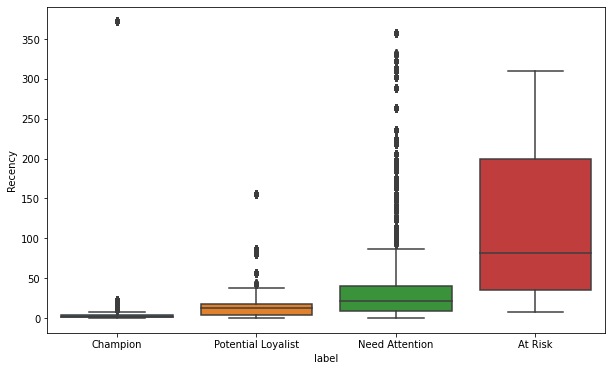

In [ ]:
fig, ax = plt.subplots(figsize=(10,6));
sns.boxplot(x='label', y = 'Recency', data = dataset_RFM)
plt.show()

Frequency (RFM_Scores)

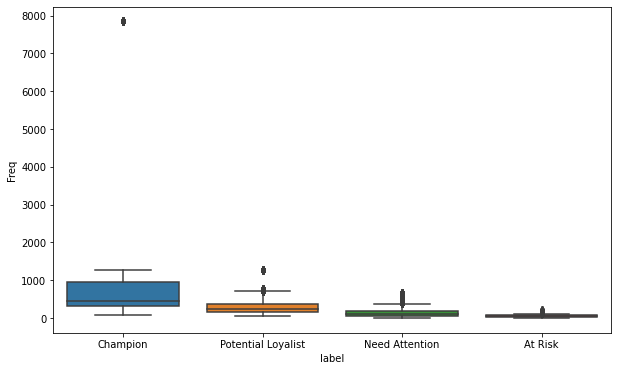

In [ ]:
fig, ax = plt.subplots(figsize=(10,6));
sns.boxplot(x='label', y = 'Freq', data = dataset_RFM)
plt.show()

Monetary (dataset - RFM_Scores)

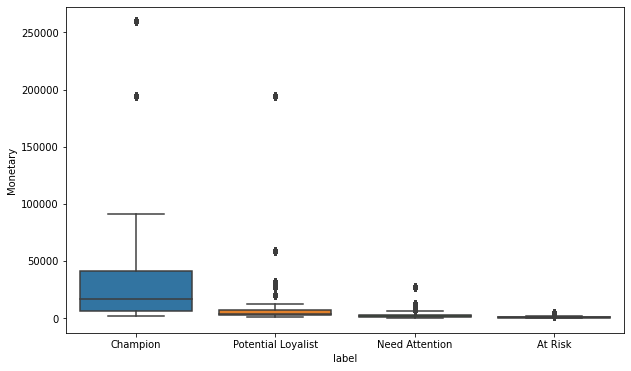

In [ ]:
fig, ax = plt.subplots(figsize=(10,6));
sns.boxplot(x='label', y = 'Monetary', data = dataset_RFM)
plt.show()

Age (dataset - RFM_Scores)

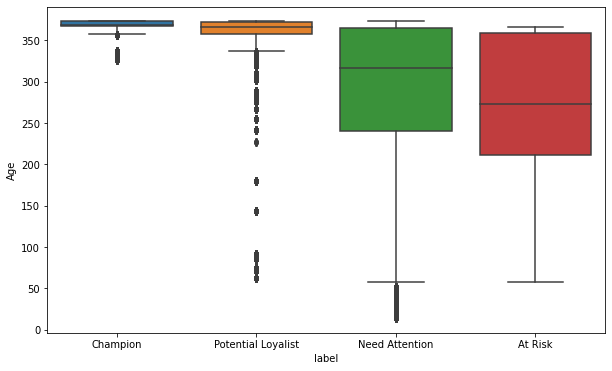

In [ ]:
fig, ax = plt.subplots(figsize=(10,6));
sns.boxplot(x='label', y = 'Age', data = dataset_RFM)
plt.show()

Return (dataset - RFM_Scores)

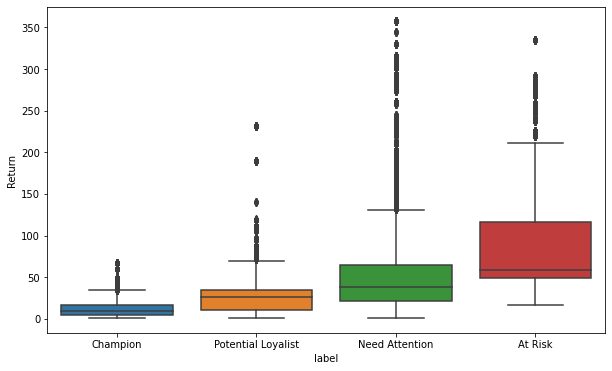

In [ ]:
fig, ax = plt.subplots(figsize=(10,6));
sns.boxplot(x='label', y = 'Return', data = dataset_RFM)
plt.show()

In [ ]:
dataset_RFM.groupby('label')[['Quantity','Price','Amount']].describe().T

label                At Risk      Champion  Need Attention  Potential Loyalist
Quantity count  30602.000000  52749.000000    96482.000000        40143.000000
         mean      10.079603     14.260062       12.646390           13.820467
         std       36.571331    325.883833       39.446931           35.888163
         min        1.000000      1.000000        1.000000            1.000000
         25%        2.000000      2.000000        2.000000            3.000000
         50%        5.000000      6.000000        6.000000            8.000000
         75%       12.000000     12.000000       12.000000           12.000000
         max     4300.000000  74215.000000     4800.000000         2880.000000
Price    count  30602.000000  52749.000000    96482.000000        40143.000000
         mean       3.922948      3.277475        3.121788            3.272369
         std       40.170667     20.549359       19.255528           13.198068
         min        0.000000      0.000000        0.000000            0.000000
         25%        1.250000      1.250000        1.250000            1.250000
         50%        2.080000      1.950000        1.950000            1.950000
         75%        3.750000      3.750000        3.750000            3.750000
         max     4161.060000   3155.950000     3949.320000         1687.170000
Amount   count  30602.000000  52749.000000    96482.000000        40143.000000
         mean      21.170499     22.959787       21.397195           23.470360
         std      233.304335    340.917476       54.273409           50.516066
         min        0.000000      0.000000        0.000000            0.000000
         25%        4.960000      5.000000        5.040000            8.500000
         50%       11.900000     12.600000       13.500000           15.000000
         75%       19.500000     19.800000       19.800000           20.800000
         max    38970.000000  77183.600000     4992.000000         3651.600000

## Who is the Wholesaler?

In [ ]:
#identify from average quantity
Mean_qty_return = dataset_RFM.groupby('Customer ID').agg({'Quantity':'mean','Return':'mean','Amount':'mean'}).reset_index()
Mean_qty_return.describe()

,Customer ID,Quantity,Return,Amount
count,678.000000,678.000000,678.000000,678.000000
mean,17478.991150,15.857532,72.434433,45.604360
std,449.940813,47.604804,65.660735,513.302927
min,16713.000000,1.000000,1.000000,2.936532
25%,17085.250000,7.162382,28.622221,13.719778
50%,17462.500000,10.642931,49.871231,18.922498
75%,17848.750000,14.424751,97.310345,25.911198
max,18287.000000,1009.500000,357.000000,13305.500000


In [ ]:
#look at customer ID below Q3
ids_temp = Mean_qty_return.loc[Mean_qty_return['Quantity']<= 3]['Customer ID']

In [ ]:
#possibly non wholesaler (persentase konsumen individu)
len(ids_temp)/Mean_qty_return['Customer ID'].shape[0]*100

3.0973451327433628

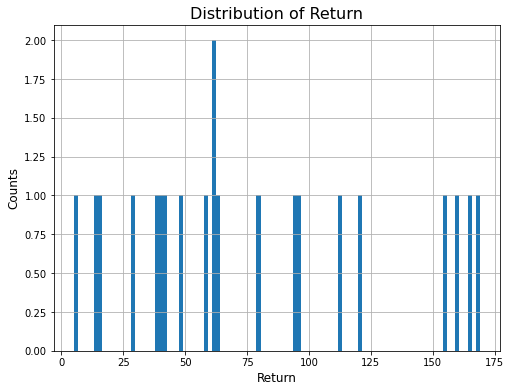

In [ ]:
fig, ax = plt.subplots(figsize=(8,6));
Mean_qty_return[Mean_qty_return['Customer ID'].isin(list(ids_temp))].Return.hist(bins=100,ax=ax)
ax.set_title("Distribution of Return", fontsize=16)
ax.set_xlabel("Return", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

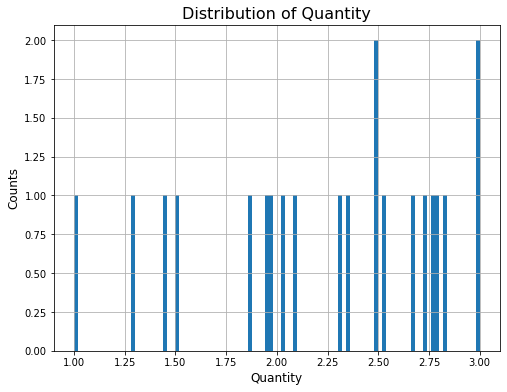

In [ ]:
fig, ax = plt.subplots(figsize=(8,6));
Mean_qty_return[Mean_qty_return['Customer ID'].isin(list(ids_temp))].Quantity.hist(bins=100,ax=ax)
ax.set_title("Distribution of Quantity", fontsize=16)
ax.set_xlabel("Quantity", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

In [ ]:
dataset_RFM['wholesaler'] = [x not in list(ids_temp) for x in dataset_RFM['Customer ID']]

In [ ]:
dataset_RFM['wholesaler'].unique()

array([ True])

In [ ]:
dataset_RFM.wholesaler.value_counts()/dataset_RFM.shape[0]

True    1.0
Name: wholesaler, dtype: float64

In [ ]:
dataset_RFM.label.value_counts()

Need Attention        92245
Champion              52749
Potential Loyalist    40108
At Risk               29599
Name: label, dtype: int64

In [ ]:
dataset_RFM[dataset_RFM['wholesaler']==True].label.value_counts()

Need Attention        92245
Champion              52749
Potential Loyalist    40108
At Risk               29599
Name: label, dtype: int64

In [ ]:
#take out non wholesaler data
dataset_RFM = dataset_RFM[dataset_RFM['wholesaler']==True]

Need Attention        92245
Champion              52749
Potential Loyalist    40108
At Risk               29599
Name: label, dtype: int64

In [ ]:
dataset.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


## Cluster Champions

In [ ]:
df = dataset_RFM[dataset_RFM['label']=='Champion']

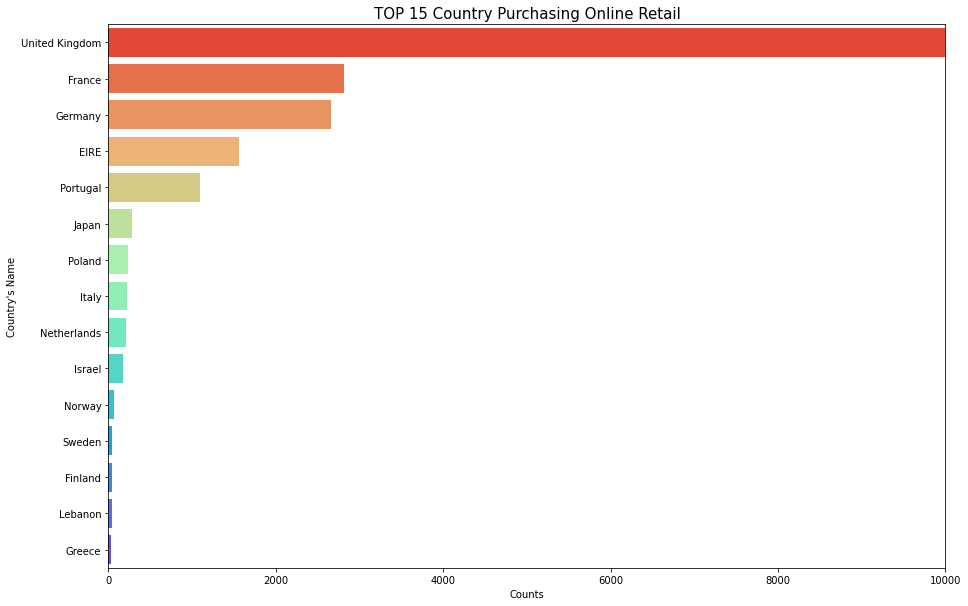

In [ ]:
country_count = df['Country'].value_counts().head(15)
plt.figure(figsize=(15,10))
# plt.style.use('seaborn')
sns.barplot(x = country_count.values, y = country_count.index, palette='rainbow_r')
plt.xlabel('Counts')
plt.ylabel("Country's Name")
plt.title('TOP 15 Country Purchasing Online Retail', fontsize=15)
plt.xlim((0,10000));
plt.savefig('TOP 15 Country Purchasing Online Retail.jpg',pil_kwargs={'quality': 95, 'optimize':True});

<ipython-input-189-cdda16d56662>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Country Distribution excluding United Kingdom',Fontsize = 16)


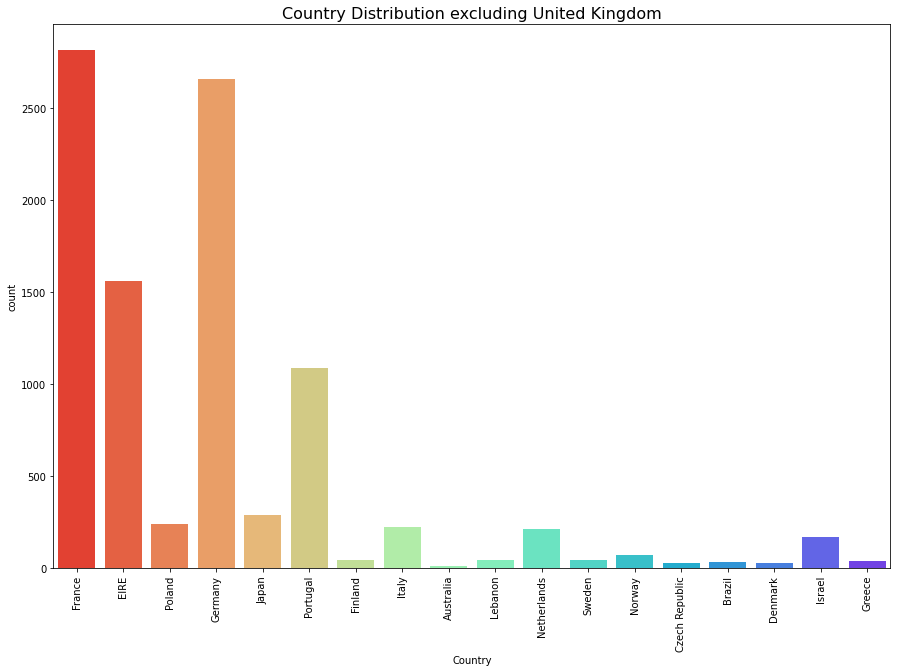

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='Country', data=df[df['Country']!="United Kingdom"], orient='v', palette='rainbow_r')
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.title('Country Distribution excluding United Kingdom',Fontsize = 16)
plt.savefig('Country Distribution excluding United Kingdom.jpeg',
            pil_kwargs={'quality': 95, 'optimize':True,'papertype':'letter'});


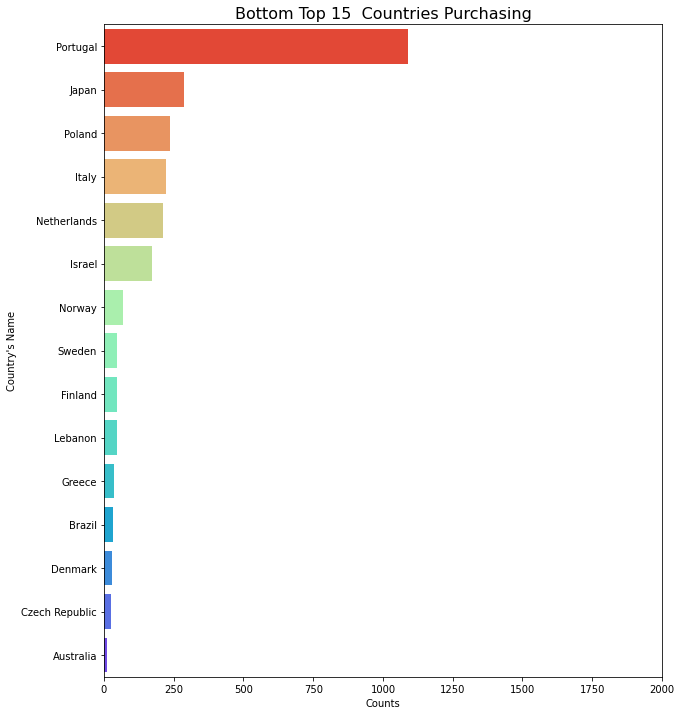

In [ ]:
# checking the different values for country in the dataset

country_count1 = df['Country'].value_counts().tail(15)
plt.figure(figsize=(10,12))
# plt.style.use('seaborn')
sns.barplot(x = country_count1.values, y = country_count1.index, palette='rainbow_r')
plt.xlabel('Counts')
plt.ylabel("Country's Name")
plt.title('Bottom Top 15  Countries Purchasing', fontsize=16)
plt.xlim((0,2000))
plt.savefig('Bottom Top 15  Countries Purchasing.jpeg',
            pil_kwargs={'quality': 95, 'optimize':True,'papertype':'letter'});

<ipython-input-203-e7a97bf27454>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['%.f' % x for x in plt.gca().get_yticks()])
No handles with labels found to put in legend.


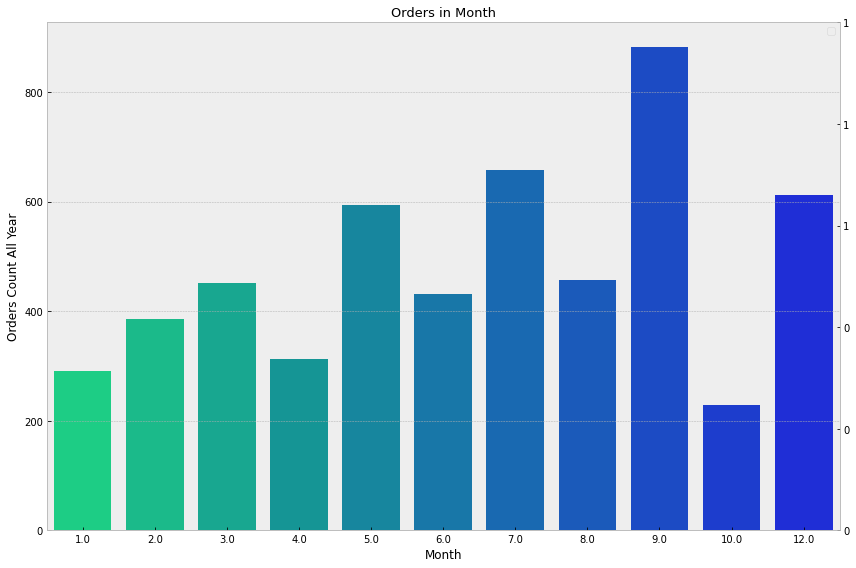

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,8))

ax2 = ax1.twinx()
# sns.lineplot(x = 'Month', y = 'Amount',
#              data=df, 
#              hue='Year', style='Year',
#               markers=True, legend='full',
#              ci=None, estimator='sum', ax=ax2)

sns.barplot(x= 'Month', y= 'Invoice',
            data=df.groupby('Month', as_index=False)['Invoice'].count(),
            palette = 'winter_r',
            ci=None, ax=ax1)


ax1.set_ylabel('Orders Count All Year', fontsize=12)
# ax2.set_ylabel('Amount Sales', fontsize=12)
    
plt.gca().set_yticklabels(['%.f' % x for x in plt.gca().get_yticks()])
plt.legend(loc='best')
plt.grid(axis='both', which='both')
plt.title(f"Orders in Month", fontsize=13)
plt.tight_layout()
plt.savefig('Orders and Amount Sales in Month.jpeg',
            pil_kwargs={'quality': 95,'papertype':'letter'});

In [ ]:
df['Week_Number'] = df['InvoiceDate'].dt.week

<ipython-input-235-9cfda37d774c>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week_Number'] = df['InvoiceDate'].dt.week
<ipython-input-235-9cfda37d774c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Week_Number'] = df['InvoiceDate'].dt.week


<ipython-input-236-2b82afee3b1d>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['%.f' % x for x in plt.gca().get_yticks()])
No handles with labels found to put in legend.


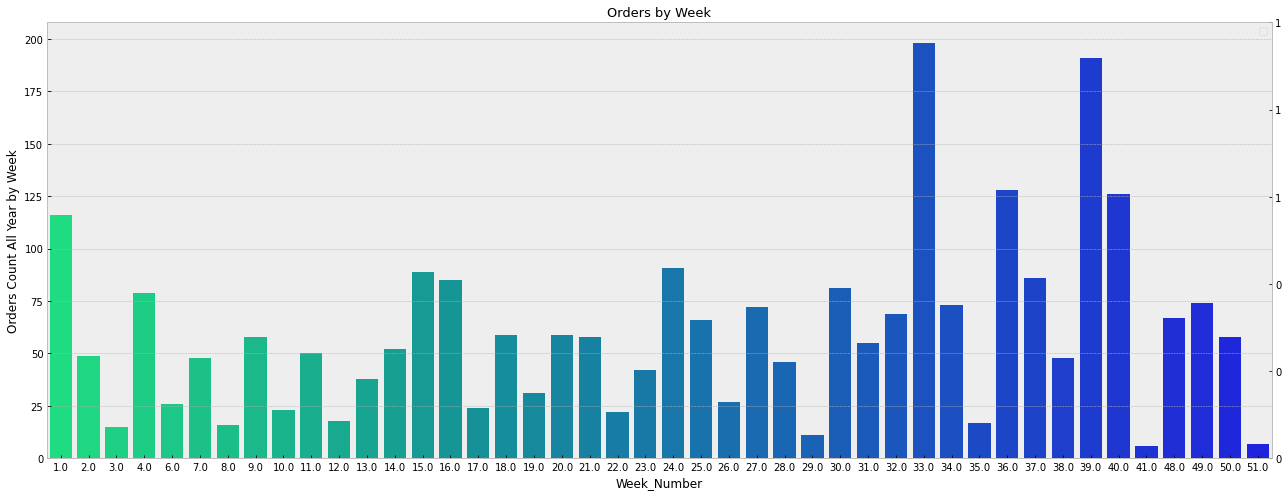

In [ ]:
plt.style.use('bmh')
fig, ax1 = plt.subplots(figsize=(18,7))

ax2 = ax1.twinx()
    
# sns.lineplot(x = 'Week_Number', y = 'Amount',
#              data=df, 
#              hue='Year', style='Year',
#              palette=['red','green'], markers=True, legend='full',
#              ci=None, estimator='sum', ax=ax2)

sns.barplot(x= 'Week_Number', y= 'Invoice',
            data=df.groupby('Week_Number', as_index=False)['Invoice'].count(),
            palette = 'winter_r',
            ci=None, ax=ax1)
    

ax1.set_ylabel('Orders Count All Year by Week', fontsize=12)
# ax2.set_ylabel('Amount Sales by Week', fontsize=12)

plt.xticks(rotation='vertical')

plt.gca().set_yticklabels(['%.f' % x for x in plt.gca().get_yticks()])
plt.legend(loc='best')
plt.grid(axis='both', which='both')

plt.title(f"Orders by Week", fontsize=13)
fig.tight_layout()
plt.savefig('Orders and Amount Sales by Week.jpeg',
            pil_kwargs={'quality': 95,'papertype':'letter'});

## Cluster Potential Loyalist

In [ ]:
df = dataset_RFM[dataset_RFM['label']=='Potential Loyalist']

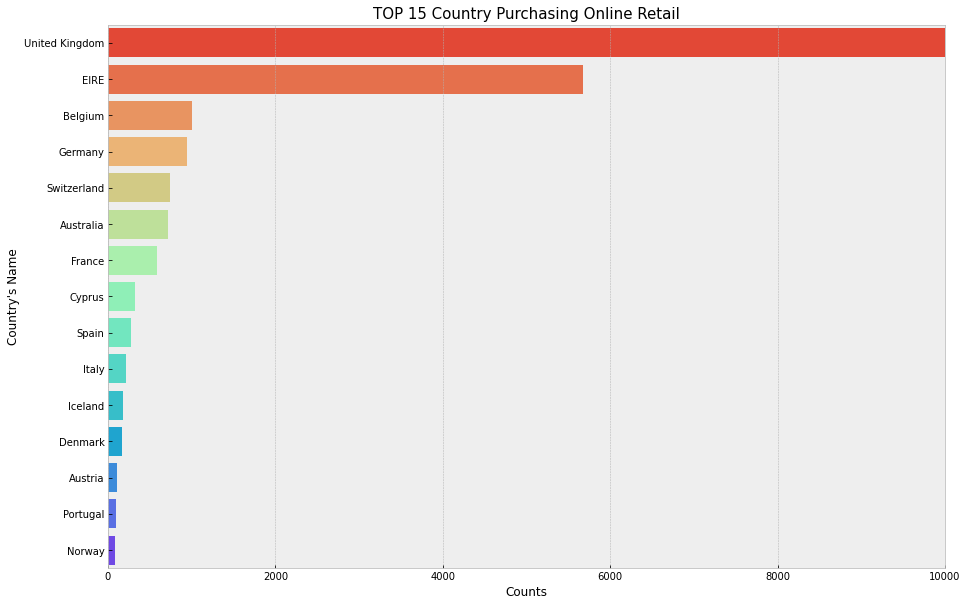

In [ ]:
country_count = df['Country'].value_counts().head(15)
plt.figure(figsize=(15,10))
# plt.style.use('seaborn')
sns.barplot(x = country_count.values, y = country_count.index, palette='rainbow_r')
plt.xlabel('Counts')
plt.ylabel("Country's Name")
plt.title('TOP 15 Country Purchasing Online Retail', fontsize=15)
plt.xlim((0,10000));
plt.savefig('TOP 15 Country Purchasing Online Retail.jpg',pil_kwargs={'quality': 95, 'optimize':True});

<ipython-input-209-cdda16d56662>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Country Distribution excluding United Kingdom',Fontsize = 16)


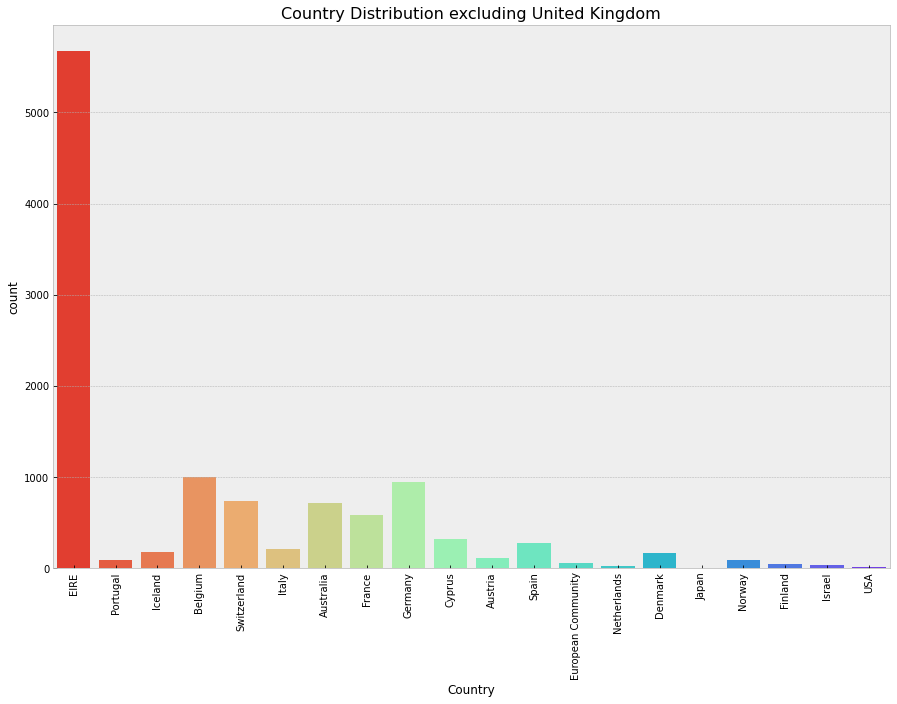

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='Country', data=df[df['Country']!="United Kingdom"], orient='v', palette='rainbow_r')
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.title('Country Distribution excluding United Kingdom',Fontsize = 16)
plt.savefig('Country Distribution excluding United Kingdom.jpeg',
            pil_kwargs={'quality': 95, 'optimize':True,'papertype':'letter'});


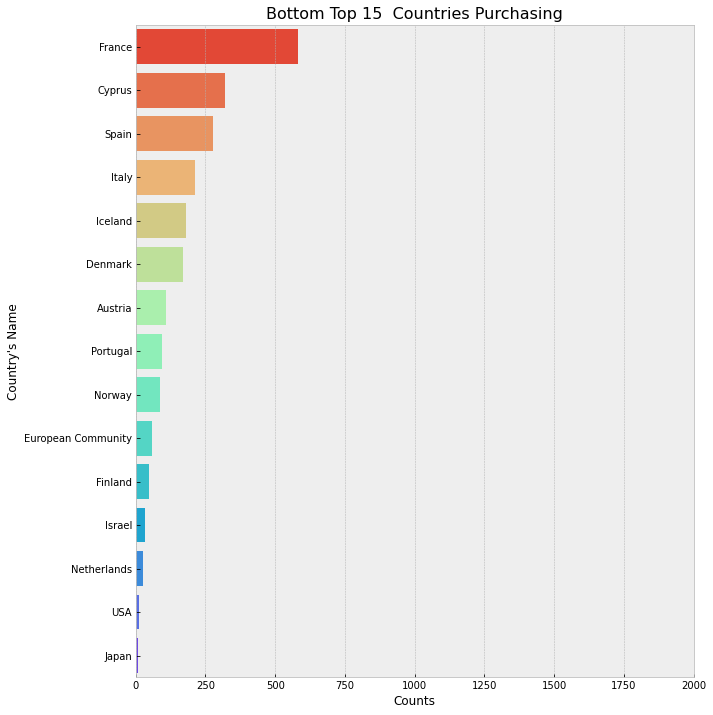

In [ ]:
# checking the different values for country in the dataset

country_count1 = df['Country'].value_counts().tail(15)
plt.figure(figsize=(10,12))
# plt.style.use('seaborn')
sns.barplot(x = country_count1.values, y = country_count1.index, palette='rainbow_r')
plt.xlabel('Counts')
plt.ylabel("Country's Name")
plt.title('Bottom Top 15  Countries Purchasing', fontsize=16)
plt.xlim((0,2000))
plt.savefig('Bottom Top 15  Countries Purchasing.jpeg',
            pil_kwargs={'quality': 95, 'optimize':True,'papertype':'letter'});

<ipython-input-212-e7a97bf27454>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['%.f' % x for x in plt.gca().get_yticks()])
No handles with labels found to put in legend.


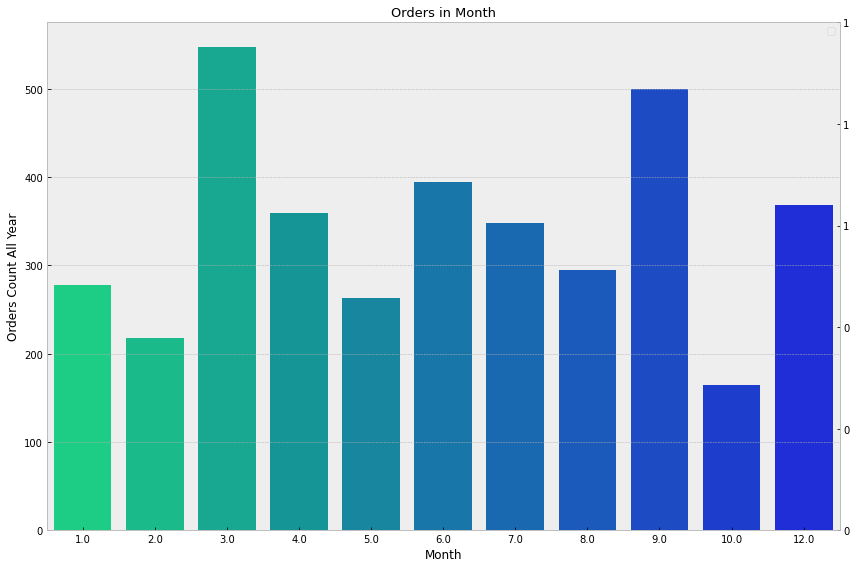

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,8))

ax2 = ax1.twinx()
# sns.lineplot(x = 'Month', y = 'Amount',
#              data=df, 
#              hue='Year', style='Year',
#               markers=True, legend='full',
#              ci=None, estimator='sum', ax=ax2)

sns.barplot(x= 'Month', y= 'Invoice',
            data=df.groupby('Month', as_index=False)['Invoice'].count(),
            palette = 'winter_r',
            ci=None, ax=ax1)


ax1.set_ylabel('Orders Count All Year', fontsize=12)
# ax2.set_ylabel('Amount Sales', fontsize=12)
    
plt.gca().set_yticklabels(['%.f' % x for x in plt.gca().get_yticks()])
plt.legend(loc='best')
plt.grid(axis='both', which='both')
plt.title(f"Orders in Month", fontsize=13)
plt.tight_layout()
plt.savefig('Orders and Amount Sales in Month.jpeg',
            pil_kwargs={'quality': 95,'papertype':'letter'});

In [ ]:
df['Week_Number'] = df['InvoiceDate'].dt.week

<ipython-input-237-9cfda37d774c>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week_Number'] = df['InvoiceDate'].dt.week
<ipython-input-237-9cfda37d774c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Week_Number'] = df['InvoiceDate'].dt.week


<ipython-input-214-2b82afee3b1d>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['%.f' % x for x in plt.gca().get_yticks()])
No handles with labels found to put in legend.


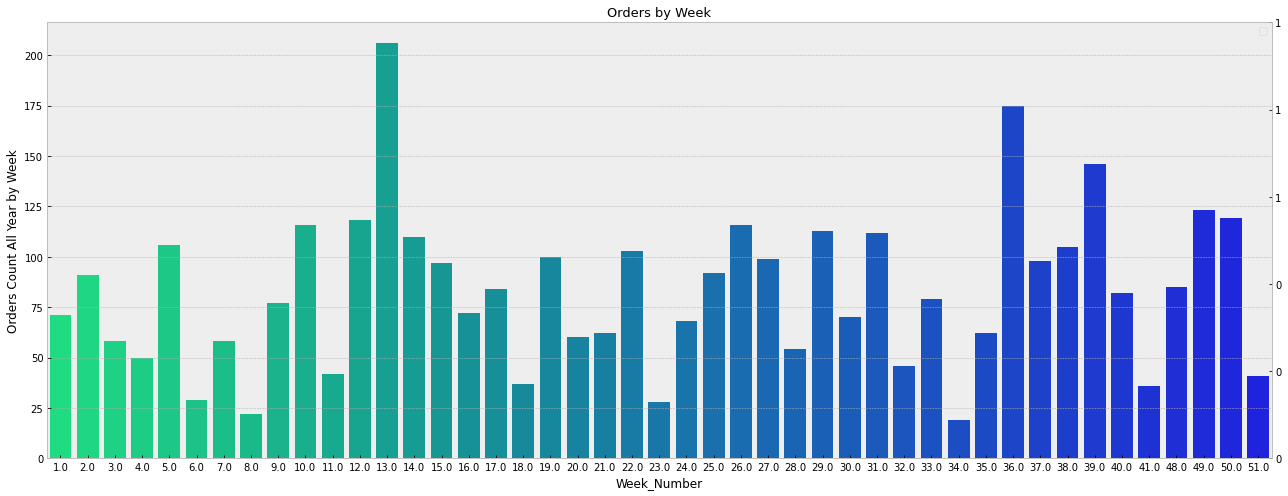

In [ ]:
plt.style.use('bmh')
fig, ax1 = plt.subplots(figsize=(18,7))

ax2 = ax1.twinx()
    
# sns.lineplot(x = 'Week_Number', y = 'Amount',
#              data=df, 
#              hue='Year', style='Year',
#              palette=['red','green'], markers=True, legend='full',
#              ci=None, estimator='sum', ax=ax2)

sns.barplot(x= 'Week_Number', y= 'Invoice',
            data=df.groupby('Week_Number', as_index=False)['Invoice'].count(),
            palette = 'winter_r',
            ci=None, ax=ax1)
    

ax1.set_ylabel('Orders Count All Year by Week', fontsize=12)
# ax2.set_ylabel('Amount Sales by Week', fontsize=12)

plt.xticks(rotation='vertical')

plt.gca().set_yticklabels(['%.f' % x for x in plt.gca().get_yticks()])
plt.legend(loc='best')
plt.grid(axis='both', which='both')

plt.title(f"Orders by Week", fontsize=13)
fig.tight_layout()
plt.savefig('Orders and Amount Sales by Week.jpeg',
            pil_kwargs={'quality': 95,'papertype':'letter'});

## Cluster Need Attention

In [ ]:
df = dataset_RFM[dataset_RFM['label']=='Need Attention']

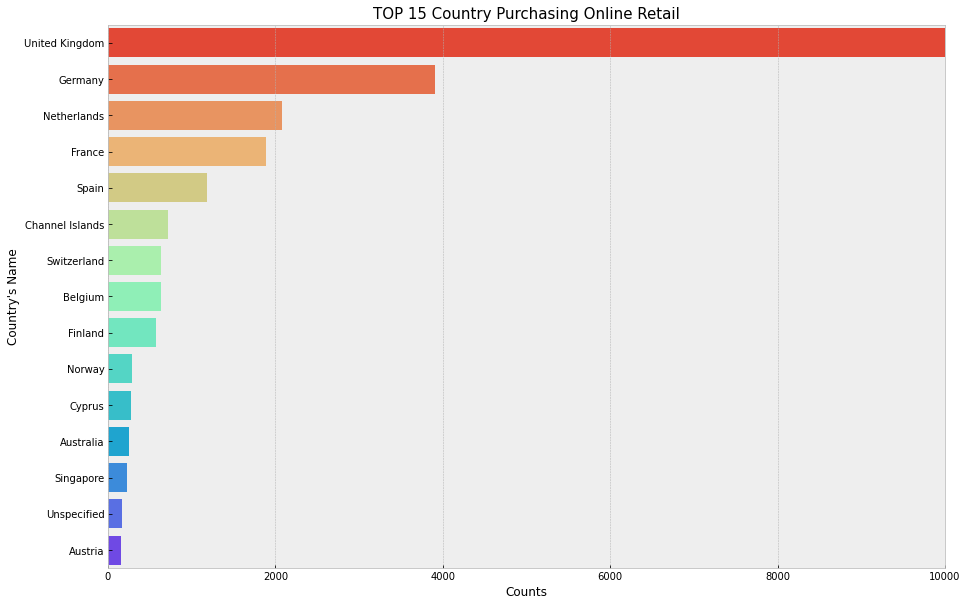

In [ ]:
country_count = df['Country'].value_counts().head(15)
plt.figure(figsize=(15,10))
# plt.style.use('seaborn')
sns.barplot(x = country_count.values, y = country_count.index, palette='rainbow_r')
plt.xlabel('Counts')
plt.ylabel("Country's Name")
plt.title('TOP 15 Country Purchasing Online Retail', fontsize=15)
plt.xlim((0,10000));
plt.savefig('TOP 15 Country Purchasing Online Retail.jpg',pil_kwargs={'quality': 95, 'optimize':True});

<ipython-input-219-cdda16d56662>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Country Distribution excluding United Kingdom',Fontsize = 16)


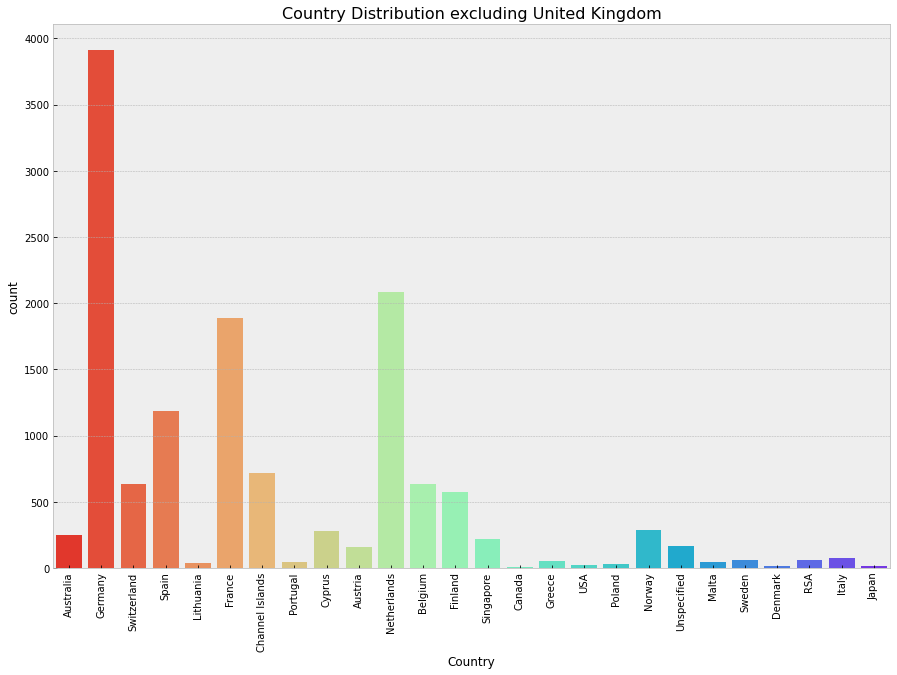

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='Country', data=df[df['Country']!="United Kingdom"], orient='v', palette='rainbow_r')
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.title('Country Distribution excluding United Kingdom',Fontsize = 16)
plt.savefig('Country Distribution excluding United Kingdom.jpeg',
            pil_kwargs={'quality': 95, 'optimize':True,'papertype':'letter'});


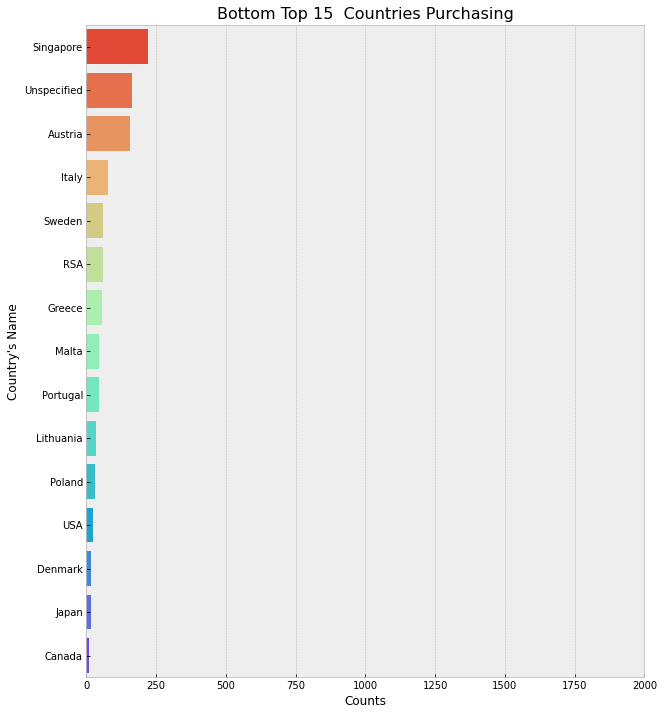

In [ ]:
# checking the different values for country in the dataset

country_count1 = df['Country'].value_counts().tail(15)
plt.figure(figsize=(10,12))
# plt.style.use('seaborn')
sns.barplot(x = country_count1.values, y = country_count1.index, palette='rainbow_r')
plt.xlabel('Counts')
plt.ylabel("Country's Name")
plt.title('Bottom Top 15  Countries Purchasing', fontsize=16)
plt.xlim((0,2000))
plt.savefig('Bottom Top 15  Countries Purchasing.jpeg',
            pil_kwargs={'quality': 95, 'optimize':True,'papertype':'letter'});

<ipython-input-222-e7a97bf27454>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['%.f' % x for x in plt.gca().get_yticks()])
No handles with labels found to put in legend.


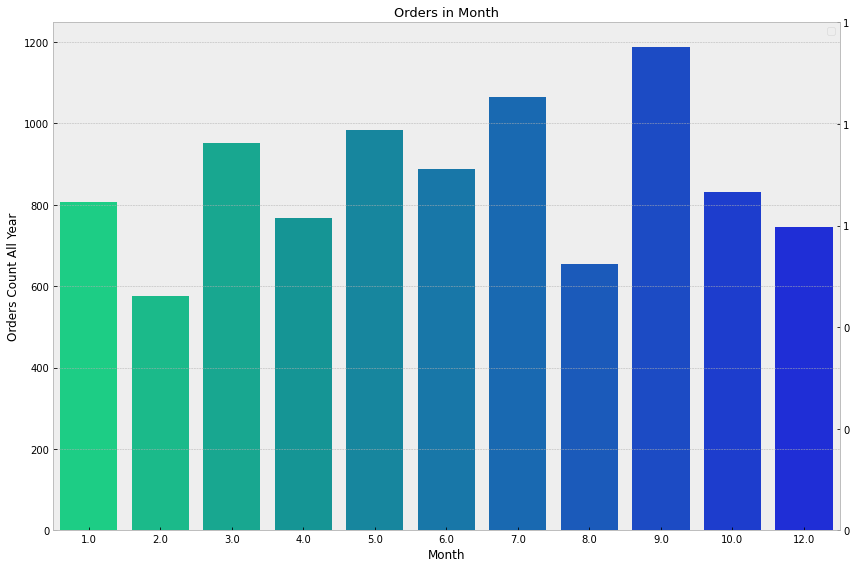

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,8))

ax2 = ax1.twinx()
# sns.lineplot(x = 'Month', y = 'Amount',
#              data=df, 
#              hue='Year', style='Year',
#               markers=True, legend='full',
#              ci=None, estimator='sum', ax=ax2)

sns.barplot(x= 'Month', y= 'Invoice',
            data=df.groupby('Month', as_index=False)['Invoice'].count(),
            palette = 'winter_r',
            ci=None, ax=ax1)


ax1.set_ylabel('Orders Count All Year', fontsize=12)
# ax2.set_ylabel('Amount Sales', fontsize=12)
    
plt.gca().set_yticklabels(['%.f' % x for x in plt.gca().get_yticks()])
plt.legend(loc='best')
plt.grid(axis='both', which='both')
plt.title(f"Orders in Month", fontsize=13)
plt.tight_layout()
plt.savefig('Orders and Amount Sales in Month.jpeg',
            pil_kwargs={'quality': 95,'papertype':'letter'});

In [ ]:
df['Week_Number'] = df['InvoiceDate'].dt.week

<ipython-input-238-9cfda37d774c>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week_Number'] = df['InvoiceDate'].dt.week
<ipython-input-238-9cfda37d774c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Week_Number'] = df['InvoiceDate'].dt.week


<ipython-input-224-2b82afee3b1d>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['%.f' % x for x in plt.gca().get_yticks()])
No handles with labels found to put in legend.


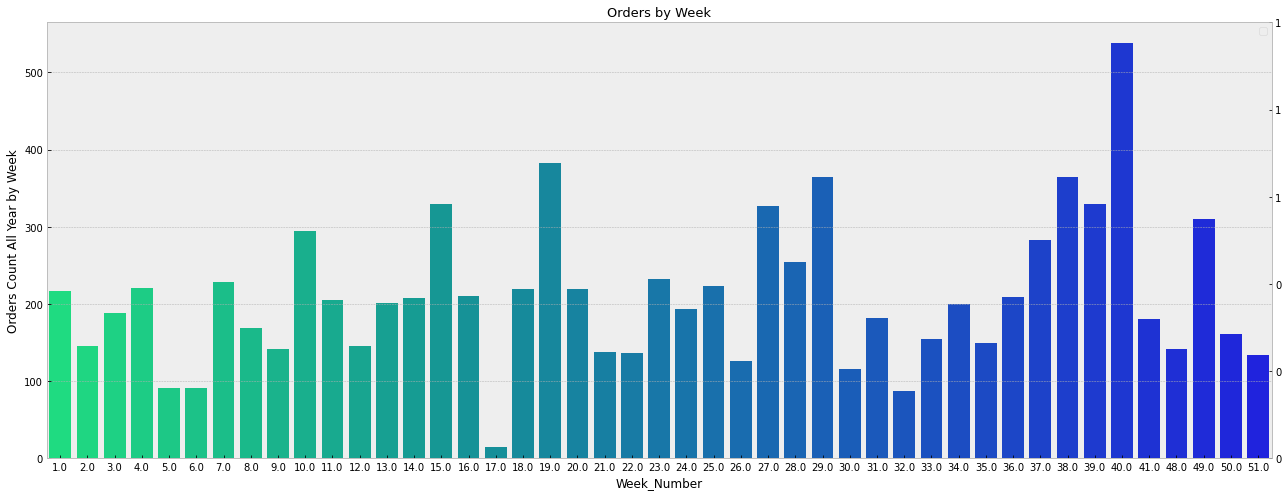

In [ ]:
plt.style.use('bmh')
fig, ax1 = plt.subplots(figsize=(18,7))

ax2 = ax1.twinx()
    
# sns.lineplot(x = 'Week_Number', y = 'Amount',
#              data=df, 
#              hue='Year', style='Year',
#              palette=['red','green'], markers=True, legend='full',
#              ci=None, estimator='sum', ax=ax2)

sns.barplot(x= 'Week_Number', y= 'Invoice',
            data=df.groupby('Week_Number', as_index=False)['Invoice'].count(),
            palette = 'winter_r',
            ci=None, ax=ax1)
    

ax1.set_ylabel('Orders Count All Year by Week', fontsize=12)
# ax2.set_ylabel('Amount Sales by Week', fontsize=12)

plt.xticks(rotation='vertical')

plt.gca().set_yticklabels(['%.f' % x for x in plt.gca().get_yticks()])
plt.legend(loc='best')
plt.grid(axis='both', which='both')

plt.title(f"Orders by Week", fontsize=13)
fig.tight_layout()
plt.savefig('Orders and Amount Sales by Week.jpeg',
            pil_kwargs={'quality': 95,'papertype':'letter'});

## Cluster At Risk

In [ ]:
dataset_RFM.label.unique()

array([nan, 'Champion', 'Potential Loyalist', 'Need Attention', 'At Risk'],
      dtype=object)

In [ ]:
df = dataset_RFM[dataset_RFM['label']=='At Risk']

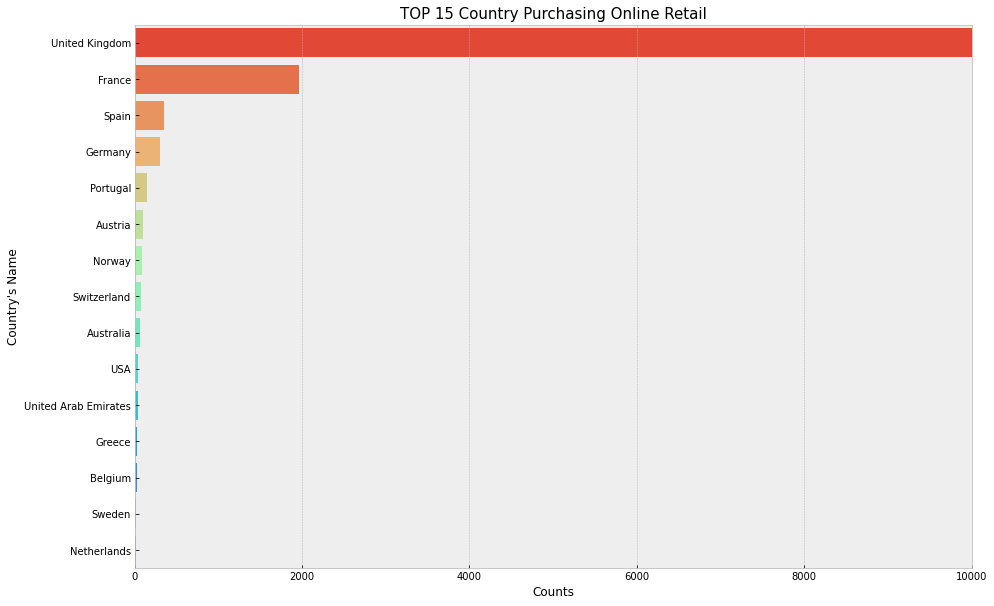

In [ ]:
country_count = df['Country'].value_counts().head(15)
plt.figure(figsize=(15,10))
# plt.style.use('seaborn')
sns.barplot(x = country_count.values, y = country_count.index, palette='rainbow_r')
plt.xlabel('Counts')
plt.ylabel("Country's Name")
plt.title('TOP 15 Country Purchasing Online Retail', fontsize=15)
plt.xlim((0,10000));
plt.savefig('TOP 15 Country Purchasing Online Retail.jpg',pil_kwargs={'quality': 95, 'optimize':True});

<ipython-input-229-cdda16d56662>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Country Distribution excluding United Kingdom',Fontsize = 16)


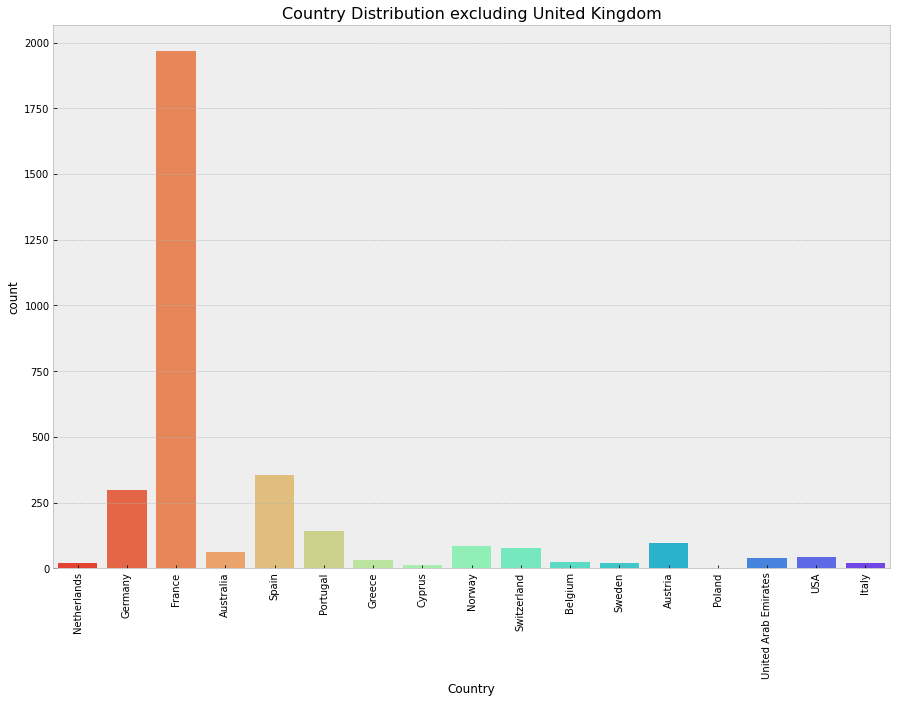

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='Country', data=df[df['Country']!="United Kingdom"], orient='v', palette='rainbow_r')
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.title('Country Distribution excluding United Kingdom',Fontsize = 16)
plt.savefig('Country Distribution excluding United Kingdom.jpeg',
            pil_kwargs={'quality': 95, 'optimize':True,'papertype':'letter'});


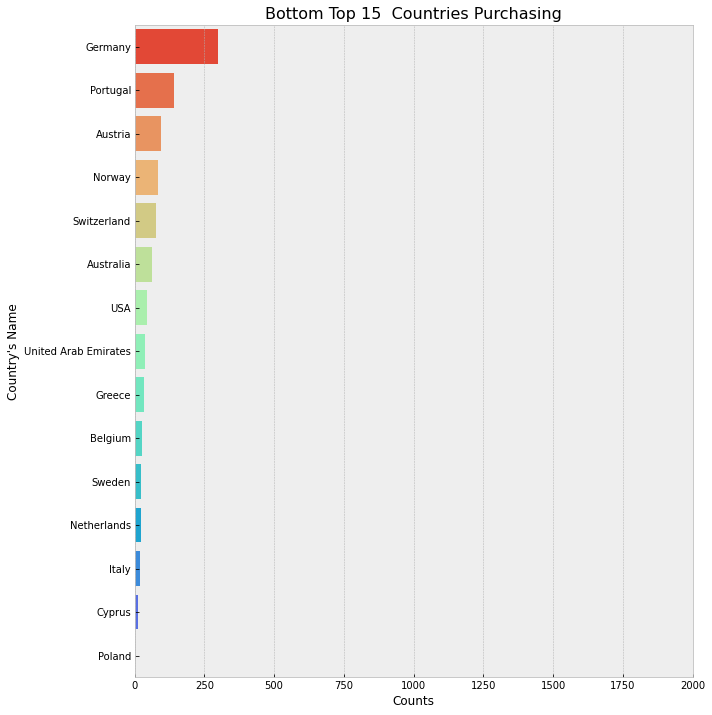

In [ ]:
# checking the different values for country in the dataset

country_count1 = df['Country'].value_counts().tail(15)
plt.figure(figsize=(10,12))
# plt.style.use('seaborn')
sns.barplot(x = country_count1.values, y = country_count1.index, palette='rainbow_r')
plt.xlabel('Counts')
plt.ylabel("Country's Name")
plt.title('Bottom Top 15  Countries Purchasing', fontsize=16)
plt.xlim((0,2000))
plt.savefig('Bottom Top 15  Countries Purchasing.jpeg',
            pil_kwargs={'quality': 95, 'optimize':True,'papertype':'letter'});

<ipython-input-232-e7a97bf27454>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['%.f' % x for x in plt.gca().get_yticks()])
No handles with labels found to put in legend.


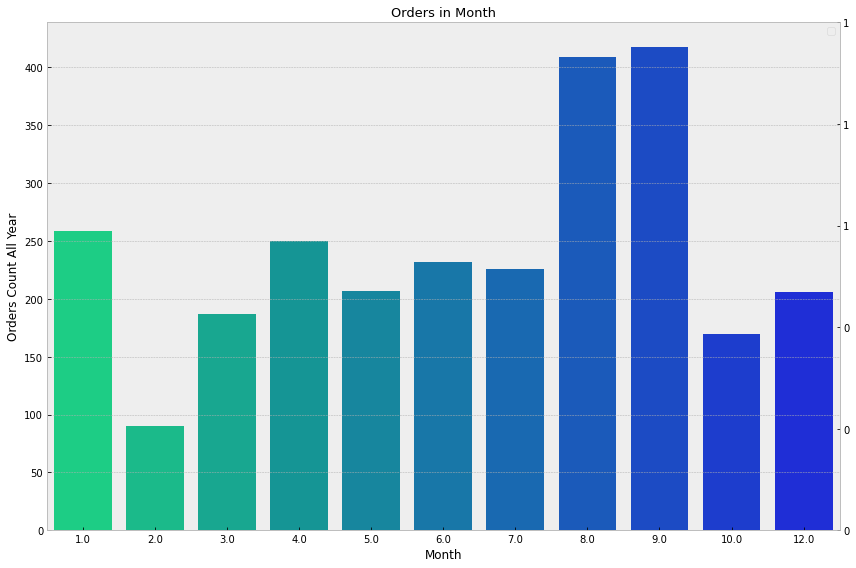

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,8))

ax2 = ax1.twinx()
# sns.lineplot(x = 'Month', y = 'Amount',
#              data=df, 
#              hue='Year', style='Year',
#               markers=True, legend='full',
#              ci=None, estimator='sum', ax=ax2)

sns.barplot(x= 'Month', y= 'Invoice',
            data=df.groupby('Month', as_index=False)['Invoice'].count(),
            palette = 'winter_r',
            ci=None, ax=ax1)


ax1.set_ylabel('Orders Count All Year', fontsize=12)
# ax2.set_ylabel('Amount Sales', fontsize=12)
    
plt.gca().set_yticklabels(['%.f' % x for x in plt.gca().get_yticks()])
plt.legend(loc='best')
plt.grid(axis='both', which='both')
plt.title(f"Orders in Month", fontsize=13)
plt.tight_layout()
plt.savefig('Orders and Amount Sales in Month.jpeg',
            pil_kwargs={'quality': 95,'papertype':'letter'});

In [ ]:
df['Week_Number'] = df['InvoiceDate'].dt.week

<ipython-input-239-9cfda37d774c>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week_Number'] = df['InvoiceDate'].dt.week
<ipython-input-239-9cfda37d774c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Week_Number'] = df['InvoiceDate'].dt.week


<ipython-input-234-2b82afee3b1d>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['%.f' % x for x in plt.gca().get_yticks()])
No handles with labels found to put in legend.


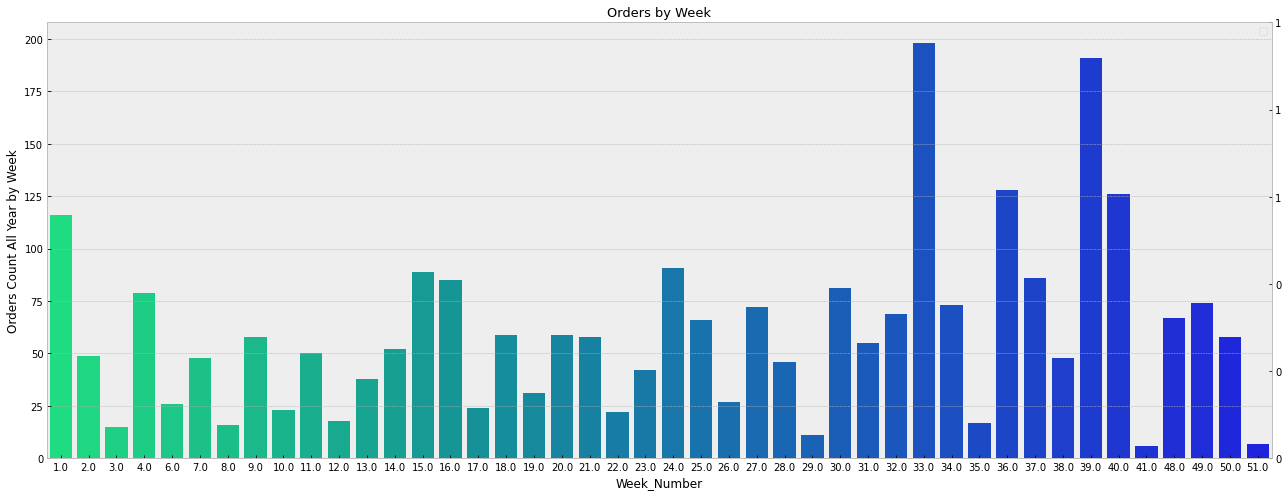

In [ ]:
plt.style.use('bmh')
fig, ax1 = plt.subplots(figsize=(18,7))

ax2 = ax1.twinx()
    
# sns.lineplot(x = 'Week_Number', y = 'Amount',
#              data=df, 
#              hue='Year', style='Year',
#              palette=['red','green'], markers=True, legend='full',
#              ci=None, estimator='sum', ax=ax2)

sns.barplot(x= 'Week_Number', y= 'Invoice',
            data=df.groupby('Week_Number', as_index=False)['Invoice'].count(),
            palette = 'winter_r',
            ci=None, ax=ax1)
    

ax1.set_ylabel('Orders Count All Year by Week', fontsize=12)
# ax2.set_ylabel('Amount Sales by Week', fontsize=12)

plt.xticks(rotation='vertical')

plt.gca().set_yticklabels(['%.f' % x for x in plt.gca().get_yticks()])
plt.legend(loc='best')
plt.grid(axis='both', which='both')

plt.title(f"Orders by Week", fontsize=13)
fig.tight_layout()
plt.savefig('Orders and Amount Sales by Week.jpeg',
            pil_kwargs={'quality': 95,'papertype':'letter'});

Other EDA:
1. Di bulan ke berapa transaksi paling banyak per cluster
2. 10 produk yang paling laris di setiap cluster
3. Bagaimana perbedaan harga dari setiap cluster
4. Di negara mana yang menjadi dominansi tempat tinggal customer per cluster
5. 5 Produk terbawah per cluster dan secara umum?
6. 5 produk terlaris secara umum
7. Sebaran age umumnya?

## Quest 1

In [ ]:
#buat variable month

dataset_RFM['month'] = pd.to_datetime(dataset_RFM['InvoiceDate']).dt.month

In [ ]:
dataset_RFM.groupby(['label','month'])['Invoice'].count()

label               month
At Risk             1         1711
                    2         1214
                    3         1953
                    4         1351
                    5         1601
                    6         1639
                    7         1668
                    8         1945
                    9         3552
                    10        4769
                    11        5185
                    12        3011
Champion            1         2826
                    2         2373
                    3         3674
                    4         3046
                    5         3822
                    6         3599
                    7         3868
                    8         3607
                    9         5452
                    10        6519
                    11        8549
                    12        5414
Need Attention      1         5142
                    2         4324
                    3         6279
                    4        

**Most transactions are on September - Dec**

## Quest 2 & 3
**cluster**, StockCode, Quantity aveg, Price avg

In [ ]:
#membuat product rating
product_rating = dataset_RFM[['Customer ID','StockCode','Quantity']].groupby(['Customer ID','StockCode']).agg({'Quantity':'sum','StockCode':[('NTrans','count')]}).reset_index()
product_rating.columns=['Customer ID','StockCode','Qty','NTrans']
product_rating

,Customer ID,StockCode,Qty,NTrans
0,16713.0,16008,24,1
1,16713.0,17021,36,1
2,16713.0,20615,12,1
3,16713.0,20652,12,1
4,16713.0,20665,6,1
...,...,...,...,...
123728,18287.0,23009,6,1
123729,18287.0,23076,24,1
123730,18287.0,23256,4,1
123731,18287.0,84991,24,1


In [ ]:
rating = []
q1 = product_rating['Qty'].quantile(.25)
q2 = product_rating['Qty'].quantile(.55)
q3 = product_rating['Qty'].quantile(.75)

for q in product_rating['Qty']:
    if q > q3 :
        rating.append(4)
    elif q > q2 :
        rating.append(3)
    elif q > q1:
        rating.append(2)
    else:
        rating.append(1)

product_rating['Rating'] = rating

In [ ]:
product_rating['Rating'].unique()

array([4, 2, 3, 1])

In [ ]:
#combine with dataset_RFM
dataset_RFM = pd.merge(dataset_RFM, product_rating, on =['Customer ID','StockCode'],how='left')
dataset_RFM.shape

(392649, 28)

In [ ]:
#champion
dataset_RFM[dataset_RFM['label']=="Champion"].groupby(['StockCode','Description']).agg({'Rating':'mean','Qty':'mean','Price':'mean'}).sort_values(by=['Rating','Qty'], ascending=False)[:10].reset_index()

,StockCode,Description,Rating,Qty,Price
0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4.0,1628.625000,0.275556
1,20914,SET/5 RED SPOTTY LID GLASS BOWLS,4.0,768.000000,2.550000
2,20725,LUNCH BAG RED SPOTTY,4.0,649.000000,1.450000
3,84212,"ASSORTED FLOWER COLOUR ""LEIS""",4.0,601.090909,0.524545
4,79164,BLACK WINE GLASS,4.0,480.000000,0.390000
5,17084R,ASSORTED INCENSE PACK,4.0,462.857143,0.181429
6,75178,ASSTD COL BUTTERFLY/CRYSTAL W/CHIME,4.0,432.000000,0.420000
7,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,4.0,412.666667,1.223611
8,22608,PENS ASSORTED FUNKY JEWELED,4.0,402.000000,0.198333
9,22492,MINI PAINT SET VINTAGE,4.0,350.384615,0.648077


In [ ]:
#Potential Loyalist
top_potential=dataset_RFM[dataset_RFM['label']=="Potential Loyalist"].groupby(['StockCode','Description']).agg({'Rating':'mean','Qty':'mean','Price':'mean'}).sort_values(by=['Rating','Qty'], ascending=False)[:10].reset_index()
top_potential

,StockCode,Description,Rating,Qty,Price
0,84568,GIRLS ALPHABET IRON ON PATCHES,4.0,864.000000,0.190000
1,40016,CHINESE DRAGON PAPER LANTERNS,4.0,627.600000,0.352000
2,22492,MINI PAINT SET VINTAGE,4.0,549.600000,0.641111
3,21641,ASSORTED TUTTI FRUTTI KEYRING BALL,4.0,494.000000,0.290000
4,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4.0,357.096774,0.285645
5,17021,NAMASTE SWAGAT INCENSE,4.0,318.000000,0.270000
6,16045,POPART WOODEN PENCILS ASST,4.0,280.000000,0.048000
7,85169C,EAU DE NIL LOVE BIRD CANDLE,4.0,244.000000,1.060000
8,22741,FUNKY DIVA PEN,4.0,216.000000,0.850000
9,23231,WRAP DOILEY DESIGN,4.0,214.285714,0.397143


In [ ]:
#Need Attention

top_attention = dataset_RFM[dataset_RFM['label']=="Need Attention"].groupby(['StockCode','Description']).agg({'Rating':'mean','Qty':'mean','Price':'mean'}).sort_values(by=['Rating','Qty'], ascending=False)[:10].reset_index()
top_attention

,StockCode,Description,Rating,Qty,Price
0,17096,ASSORTED LAQUERED INCENSE HOLDERS,4.0,836.400000,0.194000
1,79164,BLACK WINE GLASS,4.0,331.000000,0.390000
2,84568,GIRLS ALPHABET IRON ON PATCHES,4.0,288.000000,0.210000
3,84598,BOYS ALPHABET IRON ON PATCHES,4.0,288.000000,0.210000
4,17084R,ASSORTED INCENSE PACK,4.0,216.000000,0.210000
5,23388,WOODLAND MINI RUCKSACK,4.0,201.000000,4.150000
6,23203,JUMBO BAG VINTAGE DOILEY,4.0,200.000000,2.080000
7,23231,WRAP VINTAGE DOILY,4.0,186.250000,0.420000
8,22492,MINI PAINT SET VINTAGE,4.0,159.081081,0.645946
9,23446,BLUE BUNNY EASTER EGG BASKET,4.0,144.000000,1.450000


In [ ]:
#At Risk

top_risk = dataset_RFM[dataset_RFM['label']=="At Risk"].groupby(['StockCode','Description']).agg({'Rating':'mean','Qty':'mean','Price':'mean'}).sort_values(by=['Rating','Qty'], ascending=False)[:10].reset_index()#['StockCode']
top_risk

,StockCode,Description,Rating,Qty,Price
0,84568,GIRLS ALPHABET IRON ON PATCHES,4.0,2016.000000,0.196667
1,71477,COLOURED GLASS STAR T-LIGHT HOLDER,4.0,1457.142857,5.180000
2,22740,POLKADOT PEN,4.0,521.142857,0.794286
3,22316,200 BENDY SKULL STRAWS,4.0,384.000000,1.060000
4,22268,DECORATION SITTING BUNNY,4.0,328.000000,0.190000
5,84598,BOYS ALPHABET IRON ON PATCHES,4.0,288.000000,0.210000
6,84691,PACK 20 DOLLY PEGS,4.0,240.000000,0.720000
7,21395,BLUE POLKADOT BEAKER,4.0,160.000000,0.390000
8,16045,POPART WOODEN PENCILS ASST,4.0,150.000000,0.080000
9,16049,TEATIME GEL PENS ASST,4.0,144.000000,0.120000


In [ ]:
#All Label

top_all = dataset_RFM.groupby(['StockCode','Description']).agg({'Rating':'mean','Qty':'mean','Price':'mean'}).sort_values(by=['Rating','Qty'], ascending=False)[:10].reset_index()#['StockCode']
top_all

,StockCode,Description,Rating,Qty,Price
0,84568,GIRLS ALPHABET IRON ON PATCHES,4.0,775.384615,0.201667
1,20914,SET/5 RED SPOTTY LID GLASS BOWLS,4.0,768.000000,2.550000
2,20725,LUNCH BAG RED SPOTTY,4.0,649.000000,1.450000
3,17084R,ASSORTED INCENSE PACK,4.0,408.000000,0.202593
4,79164,BLACK WINE GLASS,4.0,299.400000,0.655263
5,84598,BOYS ALPHABET IRON ON PATCHES,4.0,288.000000,0.210000
6,23131,MISELTOE HEART WREATH CREAM,4.0,240.000000,4.150000
7,85230E,STRAWBRY SCENTED VOTIVE CANDLE,4.0,213.937500,0.266667
8,23203,JUMBO BAG VINTAGE DOILEY,4.0,200.000000,2.031667
9,22965,3 TRADITIONAL COOKIE CUTTERS SET,4.0,198.000000,2.037500


Price in Champion cluster is higher than others

## Question 4 : Distribution of country per cluster

In [ ]:
#Champion
dataset_RFM[dataset_RFM['label']=="Champion"].groupby(['Country'])['Customer ID'].count().sort_values(ascending=False)[:10].reset_index()

,Country,Customer ID
0,United Kingdom,43169
1,France,2812
2,Germany,2654
3,EIRE,1561
4,Portugal,1089
5,Japan,286
6,Poland,237
7,Italy,221
8,Netherlands,211
9,Israel,171


In [ ]:
#Potential Loyaliset
dataset_RFM[dataset_RFM['label']=="Potential Loyalist"].groupby(['Country'])['Customer ID'].count().sort_values(ascending=False)[:10].reset_index()

,Country,Customer ID
0,United Kingdom,28811
1,EIRE,5677
2,Belgium,1001
3,Germany,945
4,Switzerland,738
5,Australia,716
6,France,582
7,Cyprus,319
8,Spain,277
9,Italy,212


In [ ]:
#Need Attention
dataset_RFM[dataset_RFM['label']=="Need Attention"].groupby(['Country'])['Customer ID'].count().sort_values(ascending=False)[:10].reset_index()

,Country,Customer ID
0,United Kingdom,78801
1,Germany,3911
2,Netherlands,2084
3,France,1888
4,Spain,1185
5,Channel Islands,714
6,Switzerland,636
7,Belgium,633
8,Finland,570
9,Norway,286


In [ ]:
#At Risk
dataset_RFM[dataset_RFM['label']=="At Risk"].groupby(['Country'])['Customer ID'].count().sort_values(ascending=False)[:10].reset_index()

,Country,Customer ID
0,United Kingdom,26295
1,France,1969
2,Spain,356
3,Germany,300
4,Portugal,143
5,Austria,95
6,Norway,85
7,Switzerland,76
8,Australia,61
9,USA,45


## Question 5: 5 Produk terbawah per cluster dan secara umum?

In [ ]:
#Champion
bottom_champ = dataset_RFM[dataset_RFM['label']=="Champion"].groupby(['StockCode','Description']).agg({'Rating':'mean','Qty':'mean','Price':'mean'}).sort_values(by=['Rating','Qty'], ascending=True)[:5].reset_index()#['StockCode']
bottom_champ

,StockCode,Description,Rating,Qty,Price
0,16254,TRANSPARENT ACRYLIC TAPE DISPENSER,1.0,1.0,0.85
1,17011F,ORIGAMI SANDLEWOOD INCENSE+FLOWER,1.0,1.0,2.10
2,17165D,ASS COL LARGE SAND FROG P'WEIGHT,1.0,1.0,1.05
3,18097A,PINK TALL PORCELAIN T-LIGHT HOLDER,1.0,1.0,2.55
4,20653,CHERRY BLOSSOM LUGGAGE TAG,1.0,1.0,1.25


In [ ]:
#Potential Loyalist
bottom_potential = dataset_RFM[dataset_RFM['label']=="Potential Loyalist"].groupby(['StockCode','Description']).agg({'Rating':'mean','Qty':'mean','Price':'mean'}).sort_values(by=['Rating','Qty'], ascending=True)[:5].reset_index()#['StockCode']
bottom_potential

,StockCode,Description,Rating,Qty,Price
0,17012C,ORIGAMI LAVENDER INCENSE/CANDL SET,1.0,1.0,2.55
1,18097A,PINK TALL PORCELAIN T-LIGHT HOLDER,1.0,1.0,2.55
2,20616,CHERRY BLOSSOM PASSPORT COVER,1.0,1.0,0.75
3,20657,TROPICAL LUGGAGE TAG,1.0,1.0,1.25
4,20686,DOLLY MIXTURE CHILDREN'S UMBRELLA,1.0,1.0,3.25


In [ ]:
#Need Attention
bottom_attention = dataset_RFM[dataset_RFM['label']=="Need Attention"].groupby(['StockCode','Description']).agg({'Rating':'mean','Qty':'mean','Price':'mean'}).sort_values(by=['Rating','Qty'], ascending=True)[:5].reset_index()#['StockCode']
bottom_attention

,StockCode,Description,Rating,Qty,Price
0,16162L,THE KING GIFT BAG,1.0,1.0,0.65
1,16254,TRANSPARENT ACRYLIC TAPE DISPENSER,1.0,1.0,0.85
2,17090D,VANILLA INCENSE 40 CONES IN TIN,1.0,1.0,1.25
3,20655,QUEEN OF SKIES LUGGAGE TAG,1.0,1.0,1.25
4,20657,TROPICAL LUGGAGE TAG,1.0,1.0,1.25


In [ ]:
#At Risk
bottom_risk = dataset_RFM[dataset_RFM['label']=="At Risk"].groupby(['StockCode','Description']).agg({'Rating':'mean','Qty':'mean','Price':'mean'}).sort_values(by=['Rating','Qty'], ascending=True)[:5].reset_index()#['StockCode']
bottom_risk

,StockCode,Description,Rating,Qty,Price
0,16207B,PINK HEART RED HANDBAG,1.0,1.0,2.46
1,17012C,ORIGAMI LAVENDER INCENSE/CANDL SET,1.0,1.0,0.85
2,17012D,ORIGAMI ROSE INCENSE/CANDLE SET,1.0,1.0,0.85
3,17164B,ASS COL SMALL SAND GECKO P'WEIGHT,1.0,1.0,0.42
4,20663,QUEEN OF THE SKIES HOLIDAY PURSE,1.0,1.0,5.79


In [ ]:
bottom_all = dataset_RFM.groupby(['StockCode','Description']).agg({'Rating':'mean','Qty':'mean','Price':'mean'}).sort_values(by=['Rating','Qty'], ascending=True)[:5].reset_index()
bottom_all

,StockCode,Description,Rating,Qty,Price
0,18097A,PINK TALL PORCELAIN T-LIGHT HOLDER,1.0,1.0,2.550000
1,20663,QUEEN OF THE SKIES HOLIDAY PURSE,1.0,1.0,3.896667
2,20664,TROPICAL HOLIDAY PURSE,1.0,1.0,2.950000
3,20666,ECONOMY HOLIDAY PURSE,1.0,1.0,2.950000
4,20667,CHERRY BLOSSOM PURSE,1.0,1.0,2.950000


## extra 1: Country with Highest average amount

In [ ]:
high_avg_amt_country = dataset_RFM.groupby(['Country']).agg({'Amount':'mean'}).sort_values(by=['Amount'], ascending=False)[:10].reset_index()
high_avg_amt_country

,Country,Amount
0,Netherlands,120.798282
1,Australia,116.895620
2,Japan,116.561900
3,Singapore,95.852658
4,Sweden,85.096075
5,Denmark,49.882474
6,Lithuania,47.458857
7,Lebanon,37.641778
8,EIRE,36.687745
9,Brazil,35.737500


In [ ]:
#need attention
dataset_RFM[dataset_RFM['label']=="Need Attention"].groupby(['Country'])['Amount'].mean().sort_values(ascending=False)[:10].reset_index()

,Country,Amount
0,Netherlands,134.499938
1,Singapore,95.852658
2,Denmark,62.370588
3,Lithuania,47.458857
4,Switzerland,36.319607
5,Finland,32.948386
6,Spain,32.768203
7,France,29.352685
8,Australia,28.850691
9,Norway,28.561923


In [ ]:
#champion
dataset_RFM[dataset_RFM['label']=="Champion"].groupby(['Country'])['Amount'].mean().sort_values(ascending=False)[:10].reset_index()

,Country,Amount
0,Japan,100.902937
1,EIRE,77.976195
2,Norway,67.159714
3,Finland,47.914222
4,Lebanon,37.641778
5,Brazil,35.737500
6,Czech Republic,33.069600
7,Australia,31.137500
8,Germany,30.950610
9,Sweden,29.586444


In [ ]:
#at risk
dataset_RFM[dataset_RFM['label']=="At Risk"].groupby(['Country'])['Amount'].mean().sort_values(ascending=False)[:10].reset_index()

,Country,Amount
0,Greece,83.163750
1,Poland,62.960000
2,Australia,41.787869
3,Switzerland,30.339868
4,USA,29.932667
5,Netherlands,29.830000
6,Norway,29.482824
7,United Arab Emirates,26.658947
8,Portugal,26.478252
9,France,24.939685


In [ ]:
dataset_RFM[dataset_RFM['label']=="Potential Loyalist"].groupby(['Country'])['Amount'].mean().sort_values(ascending=False)[:10].reset_index()

,Country,Amount
0,Japan,872.130000
1,Australia,174.461634
2,Denmark,29.648421
3,Cyprus,27.184545
4,Italy,26.450236
5,EIRE,25.334694
6,USA,24.541818
7,Switzerland,24.385786
8,Spain,24.273574
9,Iceland,23.681319


## Extra 2: Sebaran usia per Cluster (dalam hari)

In [ ]:
dataset_RFM.groupby('label').Age.describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
At Risk,29599.0,269.412109,83.418729,58.0,215.0,273.0,359.0,366.0
Champion,52749.0,364.430302,13.309605,326.0,367.0,369.0,373.0,373.0
Need Attention,92245.0,294.458973,90.079536,14.0,255.0,319.0,366.0,373.0
Potential Loyalist,40108.0,340.316446,64.519336,63.0,358.0,366.0,372.0,373.0


# Target Campaign

In [ ]:
#Combine top and bottom product, with 5% discount for bottom products

In [ ]:
bundle_top = ['18097A', '20663','20664']
#bundle_top=dataset_RFM.groupby(['StockCode','Description']).agg({'Rating':'mean','Qty':'mean','Price':'mean'}).sort_values(by=['Rating','Qty'], ascending=False)[:10].reset_index()['StockCode']
bundle_top

['18097A', '20663', '20664']

In [ ]:
bundle_top

['18097A', '20663', '20664']

In [ ]:
#avg quantity for bundle_top and champion label
avg_qty = dataset_RFM[(dataset_RFM['label']=="Champion")&(dataset_RFM['StockCode'].isin(bundle_top))]['Qty'].mean()
avg_qty

1.0

In [ ]:
#avg frequency for bundle_top and champion label
avg_freq = dataset_RFM[(dataset_RFM['label']=="Champion")&(dataset_RFM['StockCode'].isin(bundle_top))]['Invoice'].count()
avg_freq

2

In [ ]:
#avg price for bundle_top and champion label

avg_price = dataset_RFM[(dataset_RFM['label']=="Champion")&(dataset_RFM['StockCode'].isin(bundle_top))].groupby(['StockCode'])['Price'].mean().reset_index()
avg_price

,StockCode,Price
0,18097A,2.55
1,20663,2.95


In [ ]:
price

,StockCode,Price
0,16202E,0.50
1,84568,0.21


price[price['StockCode']=="16202E"] = 5.5 - (5/100 *5.5)

In [ ]:
price[['Price']].sum()

Price    0.71
dtype: float64

In [ ]:
#harga normal
dataset_RFM[(dataset_RFM['StockCode'].isin(bundle_top))&(dataset_RFM['label']=="Champion")]['Amount'].sum()

182.44

In [ ]:
avg_qty * avg_freq * 7.509

6502.794